## Airbnb Open Data

Key Concern :-  

- What can we learn about different hosts and areas?

- What can we learn from predictions? (ex: locations, prices, reviews, etc)

- Which hosts are the busiest and why?

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [306]:
df = pd.read_csv('Airbnb_Open_Data.csv')

In [307]:
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [308]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [310]:
df.describe()

id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year  minimum nights  number of reviews  \
count      102385.000000   102190.000000      102416.000000   
mean         2012.487464        8.135845          27.483743   
std             5.765556       30.553781          49.508954   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000           1.000000   
50%          2012.000000        3.000000           7.000000   
75%          2017.000000        5.000000          30.000000   
max          2022.000000     5645.000000        1024.000000   

       reviews per month  review rate number  calculated host listings count  \
count       86720.000000       102273.000000                   102280.000000   
mean            1.374022            3.279106                        7.936605   
std             1.746621            1.284657                       32.218780   
min             0.010000            1.000000                        1.000000   
25%             0.220000            2.000000                        1.000000   
50%             0.740000            3.000000                        1.000000   
75%             2.000000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   

       availability 365  
count     102151.000000  
mean         141.133254  
std          135.435024  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          269.000000  
max         3677.000000

In [311]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [312]:
df.shape

(102599, 26)

In [313]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [314]:
df.isnull().sum()/len(df)*100

id                                 0.000000
NAME                               0.243667
host id                            0.000000
host_identity_verified             0.281679
host name                          0.395715
neighbourhood group                0.028265
neighbourhood                      0.015595
lat                                0.007797
long                               0.007797
country                            0.518524
country code                       0.127682
instant_bookable                   0.102340
cancellation_policy                0.074075
room type                          0.000000
Construction year                  0.208579
price                              0.240743
service fee                        0.266084
minimum nights                     0.398639
number of reviews                  0.178364
last review                       15.490404
reviews per month                 15.476759
review rate number                 0.317742
calculated host listings count  

license 99% of missing values and house rules has 50% of missing values in the dataset, dropping these columns are the efficient method. 

### Exploratory Data Analysis & Data Cleansing

##### Univariate Analysis and Data Cleaning

In [315]:
df.drop_duplicates(inplace=True)

In [316]:
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [317]:
df['NAME'].value_counts()

Home away from home                                  33
Hillside Hotel                                       30
Water View King Bed Hotel Room                       30
Brooklyn Apartment                                   27
New york Multi-unit building                         27
                                                     ..
Modern & trendy serenity—great High Line location     1
Quiet, light-filled, Soho apartment                   1
Sunny and cozy room 10 minutes from Times Sq.61F3     1
1 bedroom apartment across the Central Park           1
Parisian Style Apartment in Heart of Brooklyn         1
Name: NAME, Length: 61281, dtype: int64

In [318]:
df['host name'].value_counts().head(50)

Michael         878
David           761
John            577
Alex            543
Sonder (NYC)    516
Daniel          470
Karen           437
Sarah           428
Maria           421
Anna            398
Andrew          375
Chris           374
Michelle        367
Jessica         365
Mike            353
Laura           351
Blueground      312
James           308
Amy             303
Melissa         301
Jennifer        301
Anthony         289
Eric            288
Emily           282
Rachel          279
Ken             271
Jason           271
Kevin           270
Mark            269
Kara            268
Jeniffer        267
Jonathan        266
Brian           263
Joseph          258
Adam            255
Ben             252
Sam             251
Justin          248
Peter           247
Nina            243
Lisa            240
Andrea          238
Paul            236
Joe             234
Nick            233
Robert          233
Julia           231
Ryan            229
Stephanie       229
Lauren          228


In [319]:
df['host_identity_verified'].value_counts()

unconfirmed    50944
verified       50825
Name: host_identity_verified, dtype: int64

<AxesSubplot:xlabel='host_identity_verified', ylabel='count'>

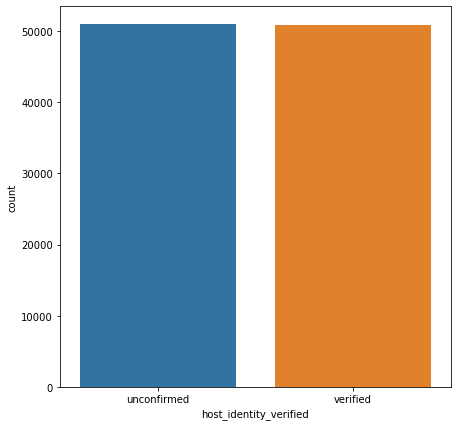

In [320]:
plt.figure(figsize=(7,7))
sns.countplot(df['host_identity_verified'])

In [321]:
df['neighbourhood group'].value_counts()

Manhattan        43557
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

<AxesSubplot:xlabel='neighbourhood group', ylabel='count'>

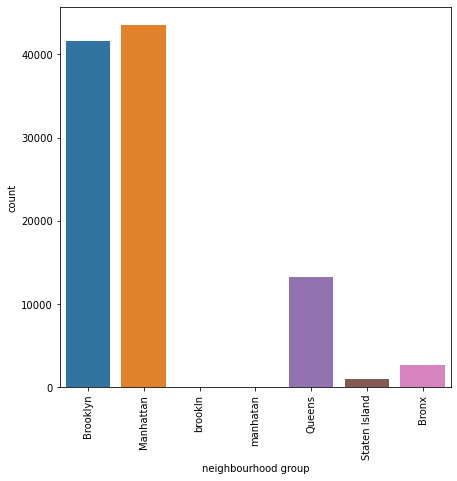

In [322]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(df['neighbourhood group'])

In [323]:
df['neighbourhood group'].replace('brookln','Brooklyn',inplace=True)
df['neighbourhood group'].replace('manhatan','Manhattan',inplace=True)

In [324]:
df['neighbourhood group'].value_counts()

Manhattan        43558
Brooklyn         41631
Queens           13197
Bronx             2694
Staten Island      949
Name: neighbourhood group, dtype: int64

<AxesSubplot:xlabel='neighbourhood group', ylabel='count'>

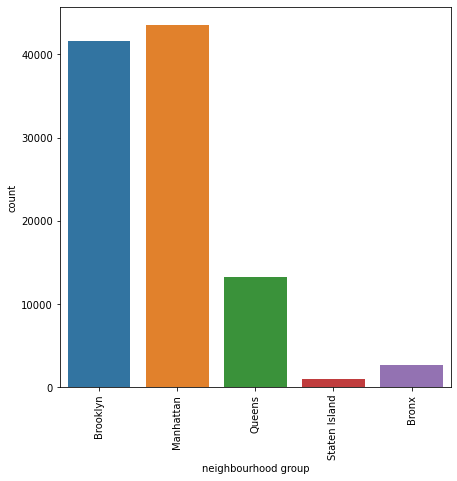

In [325]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(df['neighbourhood group'])

In [326]:
print(df['neighbourhood'].value_counts().to_string())

Bedford-Stuyvesant            7898
Williamsburg                  7732
Harlem                        5441
Bushwick                      4956
Hell's Kitchen                3949
Upper West Side               3841
Upper East Side               3656
East Village                  3477
Midtown                       3357
Crown Heights                 3251
East Harlem                   2322
Chelsea                       2276
Greenpoint                    2136
Lower East Side               1937
Astoria                       1868
Washington Heights            1771
Financial District            1480
West Village                  1473
Flatbush                      1284
East Flatbush                 1206
Prospect-Lefferts Gardens     1157
Long Island City              1142
Clinton Hill                  1135
Park Slope                    1000
Flushing                       985
Murray Hill                    958
Fort Greene                    940
Kips Bay                       915
Ridgewood           

In [327]:
df['country'].value_counts()

United States    101526
Name: country, dtype: int64

In [328]:
df['country code'].value_counts()

US    101927
Name: country code, dtype: int64

In [329]:
df['instant_bookable'].value_counts()

False    51186
True     50767
Name: instant_bookable, dtype: int64

<AxesSubplot:xlabel='instant_bookable', ylabel='count'>

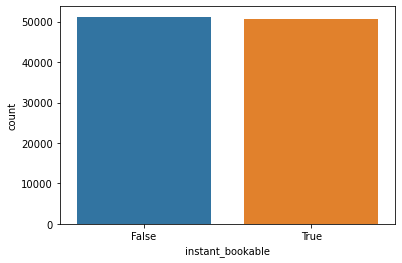

In [330]:
sns.countplot(df['instant_bookable'])

In [331]:
df['cancellation_policy'].value_counts()

moderate    34162
strict      33929
flexible    33891
Name: cancellation_policy, dtype: int64

<AxesSubplot:xlabel='cancellation_policy', ylabel='count'>

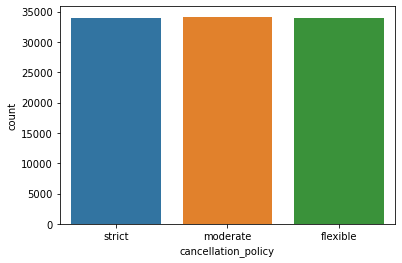

In [332]:
sns.countplot(df['cancellation_policy'])

In [333]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [334]:
df['room type'].value_counts()

Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: room type, dtype: int64

<AxesSubplot:xlabel='room type', ylabel='count'>

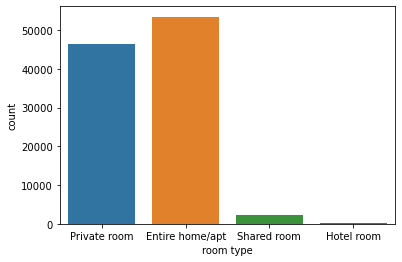

In [335]:
sns.countplot(df['room type'])

In [336]:
df['Construction year'].value_counts()

2014.0    5220
2008.0    5192
2006.0    5191
2019.0    5174
2009.0    5140
2020.0    5135
2010.0    5128
2022.0    5113
2003.0    5103
2012.0    5101
2005.0    5099
2007.0    5086
2015.0    5070
2017.0    5038
2011.0    5027
2018.0    5024
2004.0    5009
2021.0    5009
2013.0    4995
2016.0    4990
Name: Construction year, dtype: int64

In [337]:
df['Construction year'] = df['Construction year'].astype(str).str.split('.').str[0]

In [338]:
df['Construction year'].value_counts()

2014    5220
2008    5192
2006    5191
2019    5174
2009    5140
2020    5135
2010    5128
2022    5113
2003    5103
2012    5101
2005    5099
2007    5086
2015    5070
2017    5038
2011    5027
2018    5024
2021    5009
2004    5009
2013    4995
2016    4990
nan      214
Name: Construction year, dtype: int64

In [339]:
df['Construction year'].replace('nan',np.nan,inplace=True)

In [340]:
df['Construction year'].isnull().sum()

214

In [341]:
df['price'].isnull().sum()

247

In [342]:
df['price'] = df['price'].str.split('$').str[-1]

In [343]:
print(df['price'].to_string())

0           966 
1           142 
2           620 
3           368 
4           204 
5           577 
6            71 
7         1,060 
8         1,018 
9           291 
10          319 
11          606 
12          714 
13          580 
14          149 
15          578 
16          778 
17          656 
18          460 
19        1,095 
20          281 
21          477 
22          133 
23        1,050 
24          816 
25        1,175 
26          530 
27          274 
28          209 
29          432 
30          666 
31          770 
32          512 
33          858 
34          545 
35          191 
36        1,111 
37          203 
38        1,097 
39        1,020 
40        1,010 
41          563 
42          370 
43          687 
44          856 
45           62 
46          435 
47          916 
48          459 
49          363 
50          212 
51          728 
52          901 
53          335 
54          254 
55          903 
56          439 
57        1,024 
58          65

In [344]:
df['price'].replace('1,','1')

0           966 
1           142 
2           620 
3           368 
4           204 
           ...  
102053      696 
102054      909 
102055      387 
102056      848 
102057    1,128 
Name: price, Length: 102058, dtype: object

In [345]:
df1 = pd.read_csv('Airbnb_Open_Data.csv')

In [346]:
df1['price']

0           $966 
1           $142 
2           $620 
3           $368 
4           $204 
           ...   
102594      $844 
102595      $837 
102596      $988 
102597      $546 
102598    $1,032 
Name: price, Length: 102599, dtype: object

In [347]:
df['price'] = df['price'].str.replace(',','',)

In [348]:
df['price'].isnull().sum()

247

In [349]:
df['price'] = df['price'].astype(float)

In [350]:
df['price'].dtype

dtype('float64')

<AxesSubplot:xlabel='price', ylabel='Density'>

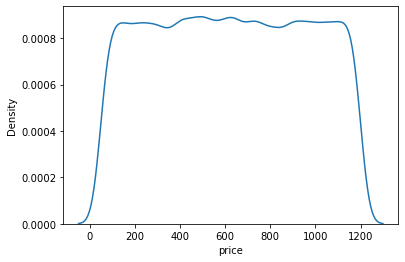

In [351]:
sns.kdeplot(df['price'])

<AxesSubplot:xlabel='price'>

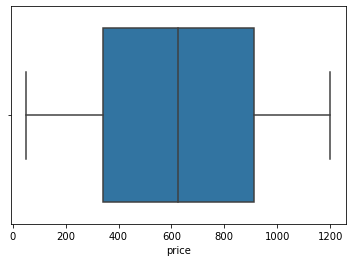

In [352]:
sns.boxplot(df['price'])

obv :- luckily there are no outliers. 

In [353]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [354]:
print(df['service fee'].to_string())

0         $193 
1          $28 
2         $124 
3          $74 
4          $41 
5         $115 
6          $14 
7         $212 
8         $204 
9          $58 
10         $64 
11        $121 
12        $143 
13        $116 
14         $30 
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20         $56 
21         $95 
22         $27 
23        $210 
24        $163 
25        $235 
26        $106 
27         $55 
28         $42 
29         $86 
30        $133 
31        $154 
32        $102 
33        $172 
34        $109 
35         $38 
36        $222 
37         $41 
38        $219 
39        $204 
40        $202 
41        $113 
42         $74 
43        $137 
44        $171 
45         $12 
46         $87 
47        $183 
48         $92 
49         $73 
50         $42 
51        $146 
52        $180 
53         $67 
54         $51 
55        $181 
56         $88 
57        $205 
58        $132 
59        $109 
60         $51 
61         $59 
62      

In [355]:
df['service fee'].isnull().sum()

273

In [356]:
df['service fee'] = df['service fee'].str.split('$').str[-1]

In [357]:
df['service fee'].isnull().sum()

273

In [358]:
df['service fee'] = df['service fee'].astype(float)

<AxesSubplot:xlabel='service fee', ylabel='Density'>

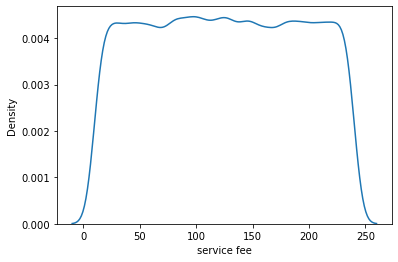

In [359]:
sns.kdeplot(df['service fee'])

<AxesSubplot:xlabel='service fee'>

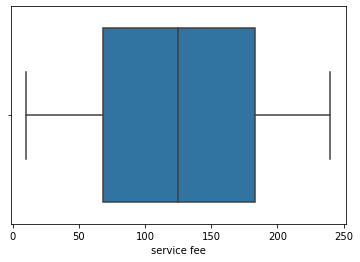

In [360]:
sns.boxplot(df['service fee'])

In [361]:
df['minimum nights'].isnull().sum()

400

In [362]:
df['minimum nights']

0         10.0
1         30.0
2          3.0
3         30.0
4         10.0
          ... 
102053     7.0
102054     1.0
102055     2.0
102056     2.0
102057     4.0
Name: minimum nights, Length: 102058, dtype: float64

<AxesSubplot:xlabel='minimum nights', ylabel='Density'>

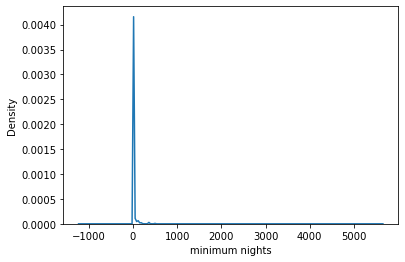

In [363]:
sns.kdeplot(df['minimum nights'])

<AxesSubplot:xlabel='minimum nights'>

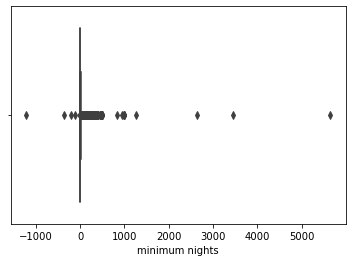

In [364]:
sns.boxplot(df['minimum nights'])

In [365]:
df['minimum nights'].value_counts()

 1.0      25290
 2.0      23495
 3.0      16038
 30.0     11554
 4.0       6606
          ...  
-3.0          1
 273.0        1
 175.0        1
 98.0         1
 825.0        1
Name: minimum nights, Length: 153, dtype: int64

In [366]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [367]:
print(df['number of reviews'].to_string())

0            9.0
1           45.0
2            0.0
3          270.0
4            9.0
5           74.0
6           49.0
7           49.0
8          430.0
9          118.0
10         160.0
11          53.0
12         188.0
13         167.0
14         113.0
15          27.0
16         148.0
17         198.0
18         260.0
19          53.0
20           0.0
21           9.0
22         130.0
23          39.0
24          71.0
25          88.0
26          19.0
27           0.0
28          58.0
29         108.0
30          29.0
31         242.0
32          88.0
33         197.0
34         273.0
35          74.0
36         168.0
37           0.0
38         231.0
39           0.0
40         214.0
41         245.0
42          15.0
43          25.0
44          81.0
45          97.0
46          11.0
47         248.0
48          61.0
49          11.0
50         135.0
51         112.0
52          73.0
53          82.0
54         328.0
55          19.0
56         105.0
57          19.0
58         289

In [368]:
df[df['number of reviews'].isnull()]

id                                              NAME  \
97       1054909                                               NaN   
141      1079210                   Modern Greenpoint, Brooklyn Apt   
566      1313938                     East Village House -- Unique!   
1066     1590088               No Inq,Read it, 1 BR, Rt of Subway,   
1591     1880045  Space! Light! Charm! 1BR close to subways & park   
...          ...                                               ...   
91027   51275548      Large, Sunny Studio in the heart of Chelsea.   
91831   51719597                    Upper East Side Cozy Apartment   
99736   56085529  Bright and Charming Private Room in Williamburg!   
100590  56557193                   Room at Home in Lower East Side   
101292  56944908      Large, Sunny Studio in the heart of Chelsea.   

            host id host_identity_verified host name neighbourhood group  \
97       8644470108               verified    Sydney           Manhattan   
141     63891709973               verified    Martin            Brooklyn   
566     77437300795            unconfirmed     Alisa           Manhattan   
1066    16471166561               verified    Sharma              Queens   
1591     5336294653               verified     Ellen           Manhattan   
...             ...                    ...       ...                 ...   
91027    2477107287            unconfirmed    Eunice           Manhattan   
91831   93404114754            unconfirmed  Vladimir           Manhattan   
99736   32648903471            unconfirmed    Naveen            Brooklyn   
100590  95585296622            unconfirmed    Andrea           Manhattan   
101292  94156210997               verified    Eunice           Manhattan   

          neighbourhood       lat      long        country  ... service fee  \
97      Upper West Side  40.79764 -73.96177  United States  ...        69.0   
141          Greenpoint  40.73409 -73.95348  United States  ...        98.0   
566        East Village  40.72956 -73.97903  United States  ...       169.0   
1066    Jackson Heights  40.74906 -73.89377  United States  ...        80.0   
1591    Upper West Side  40.79241 -73.97111  United States  ...       113.0   
...                 ...       ...       ...            ...  ...         ...   
91027           Chelsea  40.74089 -74.00002  United States  ...       139.0   
91831   Upper East Side  40.76830 -73.95919  United States  ...        30.0   
99736      Williamsburg  40.71365 -73.96232  United States  ...       109.0   
100590  Lower East Side  40.71833 -73.98556  United States  ...       134.0   
101292          Chelsea  40.74089 -74.00002  United States  ...       139.0   

       minimum nights number of reviews last review reviews per month  \
97                NaN               NaN    7/7/2019              0.71   
141               NaN               NaN         NaN              0.03   
566               1.0               NaN    7/1/2019              0.65   
1066              7.0               NaN   9/30/2018              0.64   
1591              3.0               NaN   9/18/2018              0.43   
...               ...               ...         ...               ...   
91027             2.0               NaN    1/1/2019              0.13   
91831             4.0               NaN   6/25/2019              1.33   
99736             3.0               NaN  10/10/2018              0.38   
100590            4.0               NaN   6/25/2019              0.63   
101292            2.0               NaN    1/1/2019              0.13   

        review rate number  calculated host listings count  availability 365  \
97                     NaN                             1.0              55.0   
141                    4.0                             1.0             325.0   
566                    3.0                             1.0              85.0   
1066                   5.0                             3.0             126.0   
1591                   5.0        

In [369]:
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       193.0           10.0   
1  40.75362 -73.98377  United States  ...        28.0           30.0   
2  40.80902 -73.94190  United States  ...       124.0            3.0   
3  40.68514 -73.95976  United States  ...        74.0           30.0   
4  40.79851 -73.94399  United States  ...        41.0           10.0   

  number of reviews last review reviews per month  review rate number  \
0               9.0  10/19/2021              0.21                 4.0   
1              45.0   5/21/2022              0.38                 4.0   
2               0.0         NaN               NaN                 5.0   
3             270.0    7/5/2019              4.64                 4.0   
4               9.0  11/19/2018              0.10                 3.0   

   calculated host listings count  availability 365  \
0                             6.0             286.0   
1                             2.0             228.0   
2                             1.0             352.0   
3                             1.0             322.0   
4                             1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [370]:
df['number of reviews'].isnull().sum()

183

In [371]:
df['number of reviews'].value_counts()

0.0      15673
1.0      10348
2.0       7129
3.0       5341
4.0       4125
         ...  
567.0        1
592.0        1
797.0        1
966.0        1
300.0        1
Name: number of reviews, Length: 476, dtype: int64

In [372]:
df[df['number of reviews'] == 0.0].head(100)

id                                               NAME      host id  \
2     1002403                THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
20    1012382                  Huge 2 BR Upper East  Cental Park  79805143117   
27    1016248  Magnifique Suite au N de Manhattan - vue Cloitres  38811420224   
37    1021771                        Clean and Quiet in Brooklyn  26207748876   
39    1022876                          Country space in the city  49725315867   
...       ...                                                ...          ...   
2140  2183258   Monthly rental of guest room,limited kitchen use  28761392083   
2182  2206455      Midtown West Modern & Sunny-near Central Park  25384051269   
2193  2212530               Lovely room in East Williamsburg, NY  21120623336   
2207  2220262                  Short Term Stay in Chelsea/MP NYC  44197546771   
2241  2239040                  Staten Island 1st floor Apartment   8835705542   

     host_identity_verified host name neighbourhood group       neighbourhood  \
2                       NaN     Elise           Manhattan              Harlem   
20                 verified    Audrey           Manhattan         East Harlem   
27                 verified  Adrianna           Manhattan              Inwood   
37                 verified    Arthur            Brooklyn  Bedford-Stuyvesant   
39                 verified    Deanna            Brooklyn            Flatbush   
...                     ...       ...                 ...                 ...   
2140               verified     Lorna            Brooklyn    Brooklyn Heights   
2182            unconfirmed        Tj           Manhattan      Hell's Kitchen   
2193            unconfirmed     Megan            Brooklyn        Williamsburg   
2207            unconfirmed     Renee           Manhattan             Chelsea   
2241            unconfirmed      Mary       Staten Island       Port Richmond   

           lat      long        country  ... service fee minimum nights  \
2     40.80902 -73.94190  United States  ...       124.0            3.0   
20    40.79685 -73.94872  United States  ...        56.0            7.0   
27    40.86754 -73.92639  United States  ...        55.0            4.0   
37    40.68876 -73.94312  United States  ...        41.0           60.0   
39    40.63702 -73.96327  United States  ...       204.0            1.0   
...        ...       ...            ...  ...         ...            ...   
2140  40.70162 -73.99465  United States  ...       208.0          180.0   
2182  40.76777 -73.98932  United States  ...       127.0            1.0   
2193  40.71238 -73.93790  United States  ...       131.0            2.0   
2207  40.74583 -74.00363  United States  ...       162.0            7.0   
2241  40.62922 -74.13354  United States  ...        68.0           30.0   

     number of reviews last review reviews per month  review rate number  \
2                  0.0         NaN               NaN                 5.0   
20                 0.0         NaN               NaN                 3.0   
27                 0.0         NaN               NaN                 NaN   
37                 0.0         NaN               NaN                 NaN   
39                 0.0         NaN               NaN                 3.0   
...                ...         ...               ...                 ...   
2140               0.0         NaN               NaN                 1.0   
2182               0.0         NaN               NaN                 2.0   
2193               0.0         NaN               NaN                 3.0   
2207               0.0         NaN               NaN                 1.0   
2241               0.0         NaN               NaN                 2.0   

      calculated host listings count  availability 365  \
2                                1.0             352.0   
20                               2.0             347.0   
27                               1.0              96.0   
37                 

In [373]:
df['reviews per month']

0         0.21
1         0.38
2          NaN
3         4.64
4         0.10
          ... 
102053    0.44
102054    0.72
102055    3.12
102056     NaN
102057    0.85
Name: reviews per month, Length: 102058, dtype: float64

<AxesSubplot:xlabel='reviews per month', ylabel='Density'>

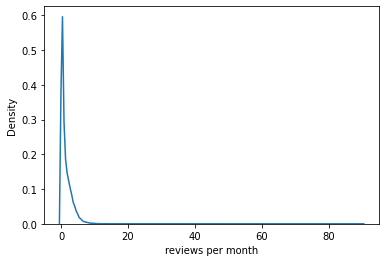

In [374]:
sns.kdeplot(df['reviews per month'])

<AxesSubplot:xlabel='reviews per month'>

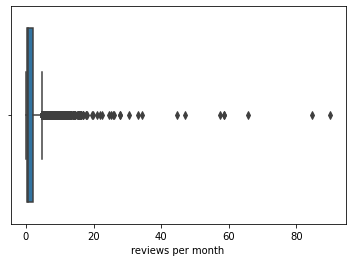

In [375]:
sns.boxplot(df['reviews per month'])

In [376]:
df['review rate number']

0         4.0
1         4.0
2         5.0
3         4.0
4         3.0
         ... 
102053    5.0
102054    3.0
102055    4.0
102056    1.0
102057    4.0
Name: review rate number, Length: 102058, dtype: float64

<AxesSubplot:xlabel='review rate number'>

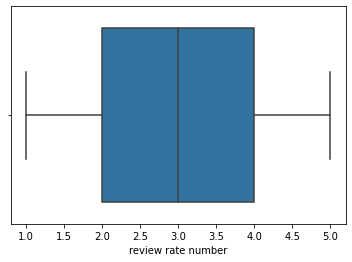

In [377]:
sns.boxplot(df['review rate number'])

In [378]:
df['review rate number'].isnull().sum()

319

In [379]:
df['last review'].isnull().sum()

15832

In [380]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [381]:
df['calculated host listings count']

0         6.0
1         2.0
2         1.0
3         1.0
4         1.0
         ... 
102053    1.0
102054    2.0
102055    2.0
102056    1.0
102057    1.0
Name: calculated host listings count, Length: 102058, dtype: float64

In [382]:
df['calculated host listings count'].value_counts()

1.0     63121
2.0     14380
3.0      6536
4.0      3529
5.0      1977
        ...  
86.0       21
22.0       20
55.0       15
46.0        9
80.0        7
Name: calculated host listings count, Length: 78, dtype: int64

In [383]:
df['calculated host listings count'].isnull().sum()

319

In [384]:
df['availability 365']

0         286.0
1         228.0
2         352.0
3         322.0
4         289.0
          ...  
102053      0.0
102054      0.0
102055    235.0
102056      0.0
102057    238.0
Name: availability 365, Length: 102058, dtype: float64

<AxesSubplot:xlabel='availability 365'>

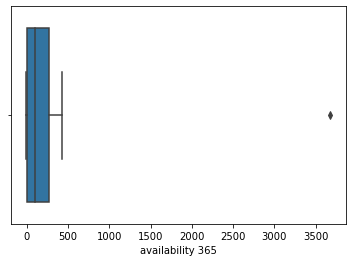

In [385]:
sns.boxplot(df['availability 365'])

In [386]:
df['availability 365'].isnull().sum()

448

In [387]:
df.drop(['id','host id','house_rules', 'license'],axis=1,inplace =True)

### Bivariate Analysis

<AxesSubplot:xlabel='NAME'>

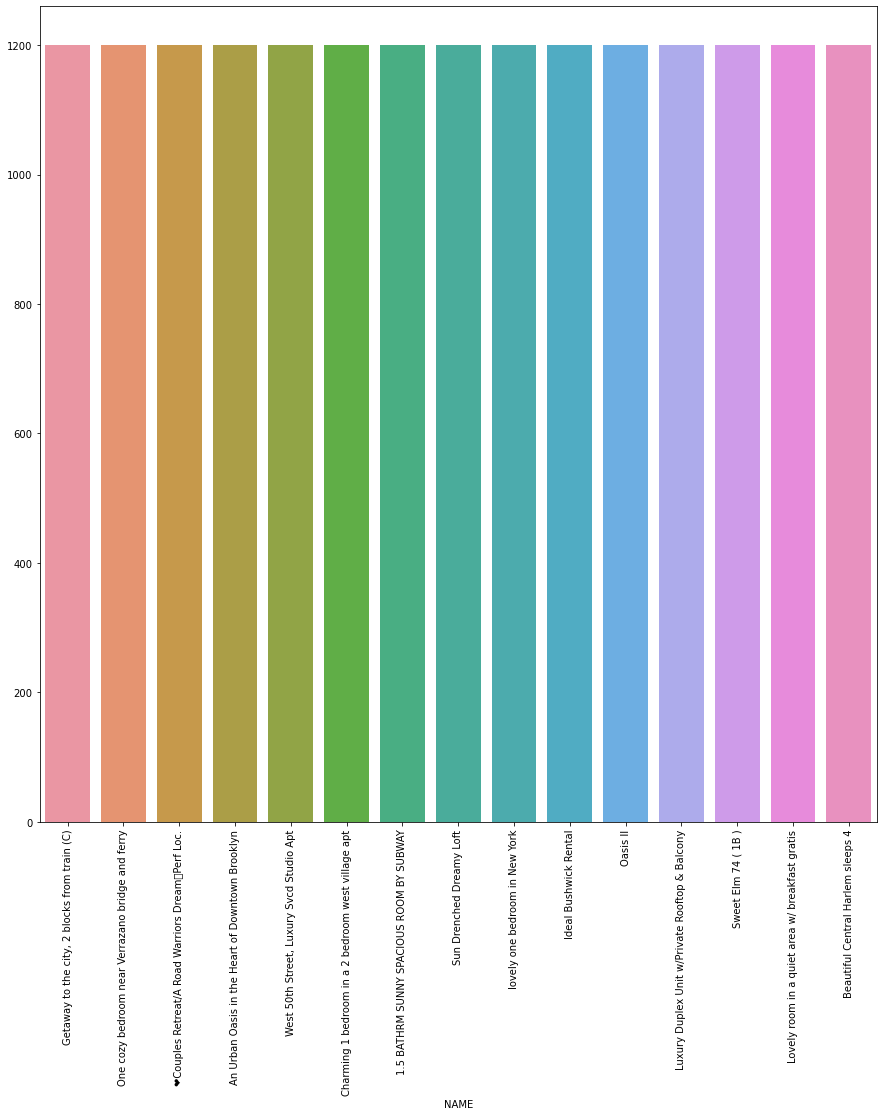

In [388]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.barplot(x = df.groupby(['NAME'])['price'].mean().sort_values(ascending=False).head(15).index,
            y =  df.groupby(['NAME'])['price'].mean().sort_values(ascending=False).head(15).values)

<AxesSubplot:xlabel='NAME'>

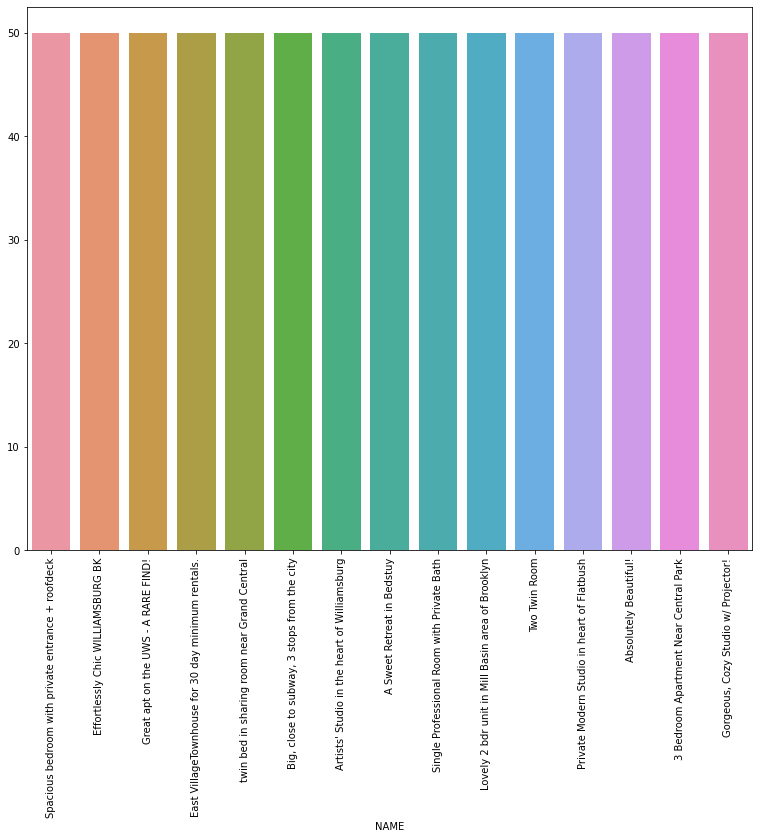

In [389]:
plt.figure(figsize=(13,10))
plt.xticks(rotation=90)
sns.barplot(x = df.groupby(['NAME'])['price'].mean().sort_values(ascending=True).head(15).index,
            y =  df.groupby(['NAME'])['price'].mean().sort_values(ascending=True).head(15).values)

In [390]:
df.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

<AxesSubplot:xlabel='host_identity_verified', ylabel='price'>

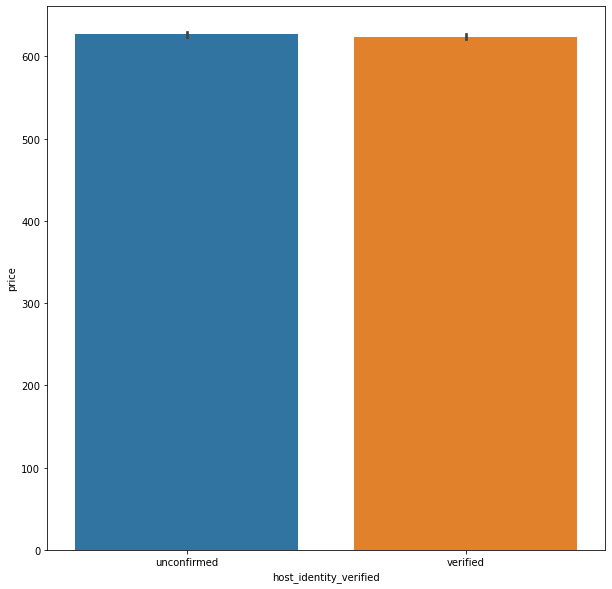

In [391]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['host_identity_verified'],y=df['price'])

<AxesSubplot:xlabel='host_identity_verified', ylabel='service fee'>

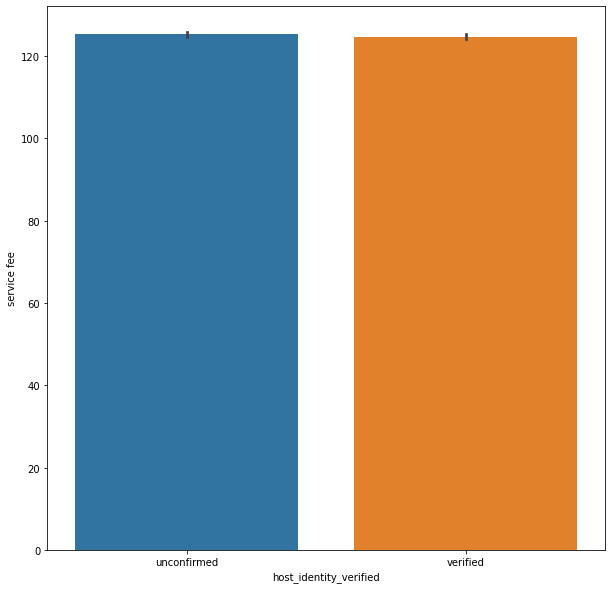

In [392]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['host_identity_verified'],y=df['service fee'])

In [393]:
df.groupby(['host_identity_verified'])['service fee'].mean().head()

host_identity_verified
unconfirmed    125.317261
verified       124.744180
Name: service fee, dtype: float64

<AxesSubplot:xlabel='host_identity_verified', ylabel='number of reviews'>

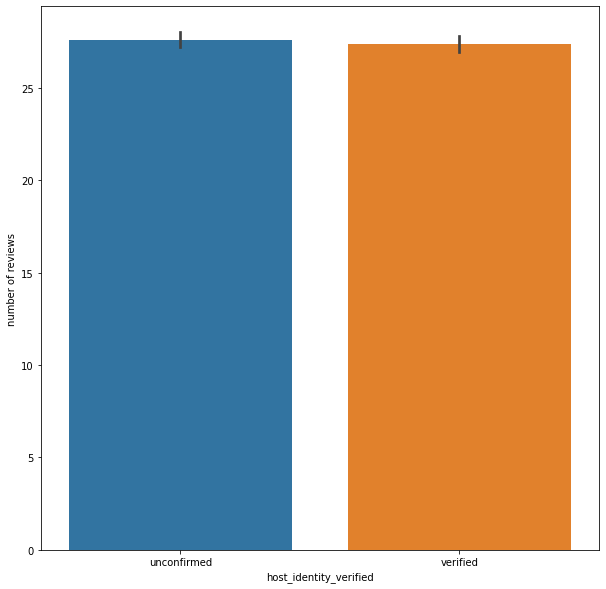

In [394]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['host_identity_verified'],y=df['number of reviews'])

In [395]:
df.groupby(['host_identity_verified'])['number of reviews'].mean().head()

host_identity_verified
unconfirmed    27.577715
verified       27.351213
Name: number of reviews, dtype: float64

In [396]:
df.head()

NAME host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !                    NaN   
3                                               NaN            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  host name neighbourhood group neighbourhood       lat      long  \
0  Madaline            Brooklyn    Kensington  40.64749 -73.97237   
1     Jenna           Manhattan       Midtown  40.75362 -73.98377   
2     Elise           Manhattan        Harlem  40.80902 -73.94190   
3     Garry            Brooklyn  Clinton Hill  40.68514 -73.95976   
4    Lyndon           Manhattan   East Harlem  40.79851 -73.94399   

         country country code instant_bookable  ... Construction year  price  \
0  United States           US            False  ...              2020  966.0   
1  United States           US            False  ...              2007  142.0   
2  United States           US             True  ...              2005  620.0   
3  United States           US             True  ...              2005  368.0   
4  United States           US            False  ...              2009  204.0   

  service fee  minimum nights  number of reviews  last review  \
0       193.0            10.0                9.0   10/19/2021   
1        28.0            30.0               45.0    5/21/2022   
2       124.0             3.0                0.0          NaN   
3        74.0            30.0              270.0     7/5/2019   
4        41.0            10.0                9.0   11/19/2018   

   reviews per month review rate number  calculated host listings count  \
0               0.21                4.0                             6.0   
1               0.38                4.0                             2.0   
2                NaN                5.0                             1.0   
3               4.64                4.0                             1.0   
4               0.10                3.0                             1.0   

   availability 365  
0             286.0  
1             228.0  
2             352.0  
3             322.0  
4             289.0  

[5 rows x 22 columns]

<AxesSubplot:xlabel='host_identity_verified', ylabel='reviews per month'>

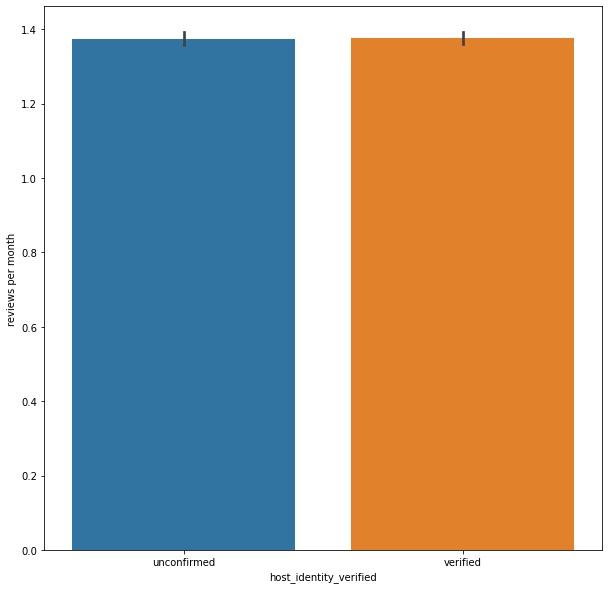

In [397]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['host_identity_verified'],y=df['reviews per month'])

In [398]:
df.groupby(['host_identity_verified'])['reviews per month'].mean().head()

host_identity_verified
unconfirmed    1.374656
verified       1.375744
Name: reviews per month, dtype: float64

In [399]:
df.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [400]:
df.groupby(['host name'])['price'].mean().sort_values(ascending=False).head(20)

host name
Denae            1200.0
Esaie            1200.0
Chun Kit         1200.0
Jeff & TJ        1200.0
Antonin          1200.0
Ilean            1200.0
Rema             1200.0
Alejandrina      1199.0
Gat              1199.0
J And Lana       1199.0
Muneeza          1199.0
Aidas            1198.0
Céline           1198.0
Maximillian      1198.0
Leojohn          1198.0
Sunika           1198.0
Kethy            1198.0
Glenis           1198.0
Nahi             1198.0
Tamara & Fran    1198.0
Name: price, dtype: float64

###### Top 20 host 

In [401]:
df['host name'].value_counts(sort=True).head(20).index

Index(['Michael', 'David', 'John', 'Alex', 'Sonder (NYC)', 'Daniel', 'Karen',
       'Sarah', 'Maria', 'Anna', 'Andrew', 'Chris', 'Michelle', 'Jessica',
       'Mike', 'Laura', 'Blueground', 'James', 'Amy', 'Melissa'],
      dtype='object')

<AxesSubplot:>

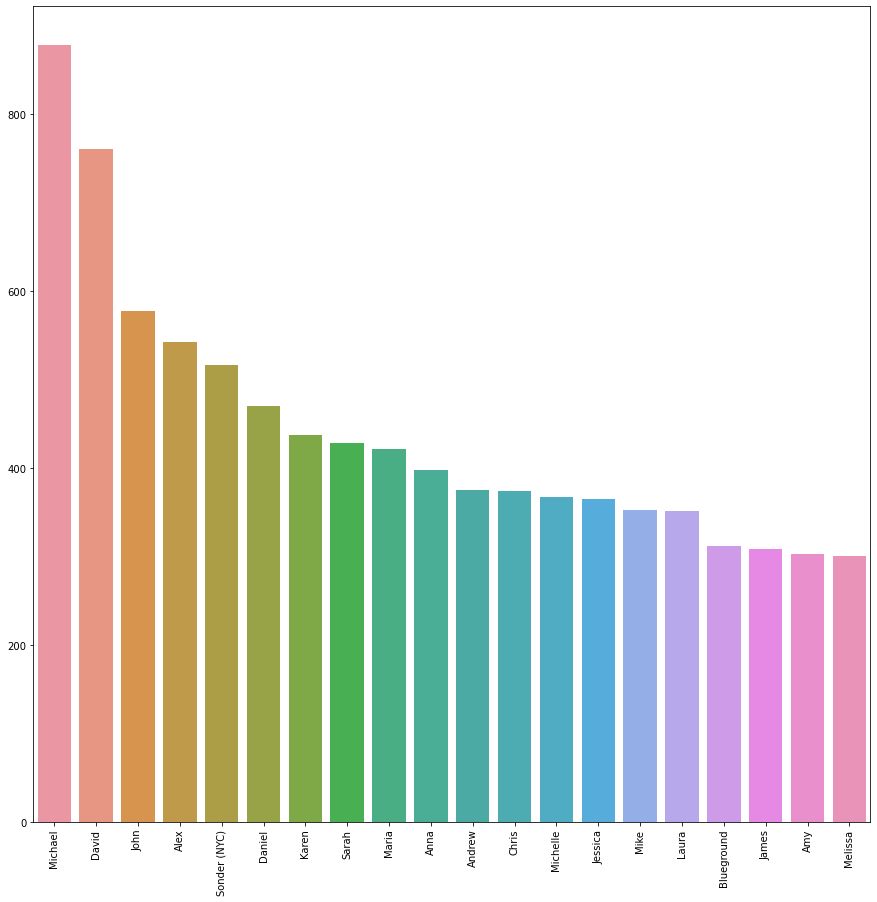

In [402]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.barplot(x=df['host name'].value_counts(sort=True).head(20).index,
            y=df['host name'].value_counts(sort=True).head(20).values)

<AxesSubplot:xlabel='host name'>

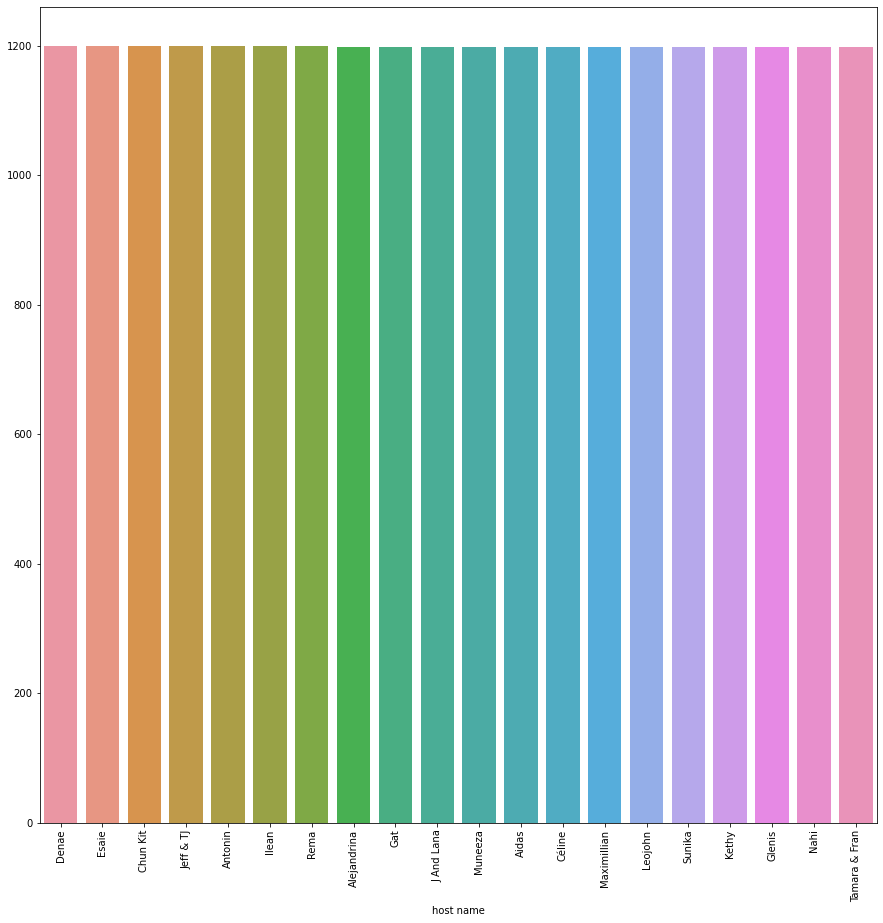

In [403]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.barplot(x = df.groupby(['host name'])['price'].mean().sort_values(ascending=False).head(20).index,
            y =  df.groupby(['host name'])['price'].mean().sort_values(ascending=False).head(20).values)

In [404]:
df.groupby(['host name'])['price'].mean().sort_values(ascending=False).head(20).index

Index(['Denae', 'Esaie', 'Chun Kit', 'Jeff & TJ', 'Antonin', 'Ilean', 'Rema',
       'Alejandrina', 'Gat', 'J And Lana', 'Muneeza', 'Aidas', 'Céline',
       'Maximillian', 'Leojohn', 'Sunika', 'Kethy', 'Glenis', 'Nahi',
       'Tamara & Fran'],
      dtype='object', name='host name')

'Rema', 'Esaie', 'Ilean', 'Antonin', 'Chun Kit', 'Jeff & TJ', 'Denae','J And Lana', 'Alejandrina', 'Muneeza', 'Gat', 'Nahi', 'Sunika','Kethy', 'Leojohn', 'Céline', 'Aidas', 'Glenis', 'Maximillian'and 'Tamara & Fran' are 20 host who earned more price 

In [405]:
df.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

<AxesSubplot:xlabel='host name'>

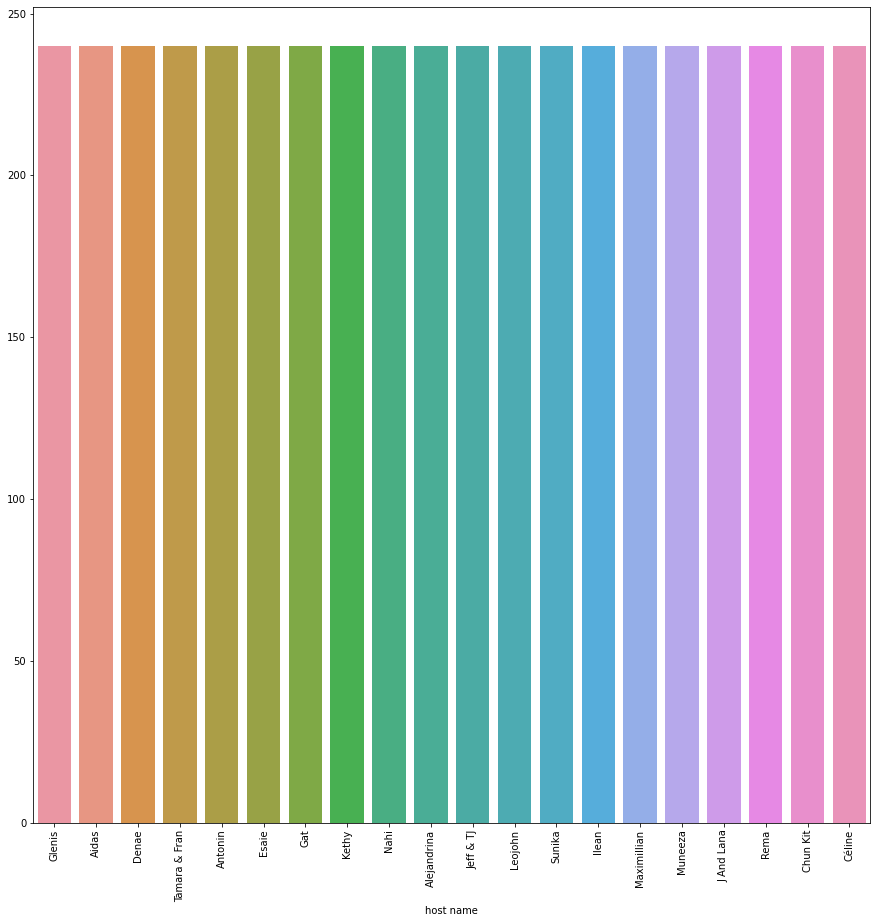

In [406]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.barplot(x = df.groupby(['host name'])['service fee'].mean().sort_values(ascending=False).head(20).index,
            y =  df.groupby(['host name'])['service fee'].mean().sort_values(ascending=False).head(20).values)

In [407]:
df.groupby(['host name'])['price'].median().head(20)

host name
#NAME?                              378.0
'Cil                                569.0
(Ari) HENRY LEE                    1179.0
(Email hidden by Airbnb)            233.0
(Mary) Haiy                         465.0
123                                1184.0
2018Serenity                       1091.0
371                                 805.0
475                                 513.0
48Lex                               532.5
5 Star Stays                        312.0
@ Art House Monique                 495.0
A                                   602.0
A & Faye Bed Anfd Breakfast Inc     939.0
A & H                               132.0
A Tree Grows In Brooklyn            520.0
A-B                                 354.0
A. Kaylee                           739.5
A. Nicholas                         200.0
A.B.                                542.0
Name: price, dtype: float64

In [408]:
dummy_df = df.groupby('host name')['price'].agg(['count', 'mean'])


In [409]:
dummy_df = dummy_df.sort_values(by='count', ascending=False).head(20)

In [410]:
dummy_df['mean']

host name
Michael         658.585812
David           645.307895
John            626.357766
Alex            623.451197
Sonder (NYC)    616.569767
Daniel          658.885106
Karen           644.514943
Sarah           620.600467
Maria           612.997619
Anna            627.695214
Andrew          626.466667
Chris           641.579088
Michelle        583.163934
Jessica         624.673973
Mike            608.238636
Laura           655.497143
Blueground      603.365385
James           614.983766
Amy             636.657807
Jennifer        626.973333
Name: mean, dtype: float64

<AxesSubplot:xlabel='host name', ylabel='mean'>

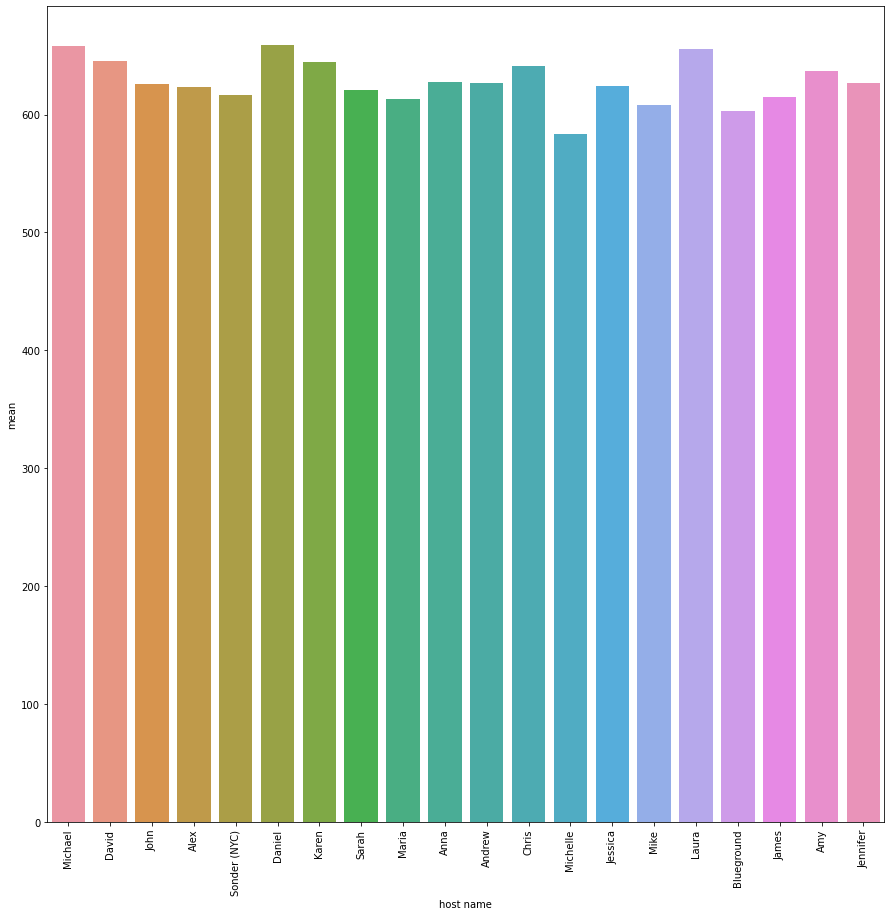

In [411]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
plt.xlabel("Host Name")
plt.ylabel("Price")
sns.barplot(x = dummy_df.index,y = dummy_df['mean'])

In [412]:
df.head()

NAME host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !                    NaN   
3                                               NaN            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  host name neighbourhood group neighbourhood       lat      long  \
0  Madaline            Brooklyn    Kensington  40.64749 -73.97237   
1     Jenna           Manhattan       Midtown  40.75362 -73.98377   
2     Elise           Manhattan        Harlem  40.80902 -73.94190   
3     Garry            Brooklyn  Clinton Hill  40.68514 -73.95976   
4    Lyndon           Manhattan   East Harlem  40.79851 -73.94399   

         country country code instant_bookable  ... Construction year  price  \
0  United States           US            False  ...              2020  966.0   
1  United States           US            False  ...              2007  142.0   
2  United States           US             True  ...              2005  620.0   
3  United States           US             True  ...              2005  368.0   
4  United States           US            False  ...              2009  204.0   

  service fee  minimum nights  number of reviews  last review  \
0       193.0            10.0                9.0   10/19/2021   
1        28.0            30.0               45.0    5/21/2022   
2       124.0             3.0                0.0          NaN   
3        74.0            30.0              270.0     7/5/2019   
4        41.0            10.0                9.0   11/19/2018   

   reviews per month review rate number  calculated host listings count  \
0               0.21                4.0                             6.0   
1               0.38                4.0                             2.0   
2                NaN                5.0                             1.0   
3               4.64                4.0                             1.0   
4               0.10                3.0                             1.0   

   availability 365  
0             286.0  
1             228.0  
2             352.0  
3             322.0  
4             289.0  

[5 rows x 22 columns]

In [413]:
d2  = df.groupby('host name')['number of reviews'].agg(['count', 'mean'])


In [414]:
d2 = d2.sort_values(by='count', ascending=False).head(20)

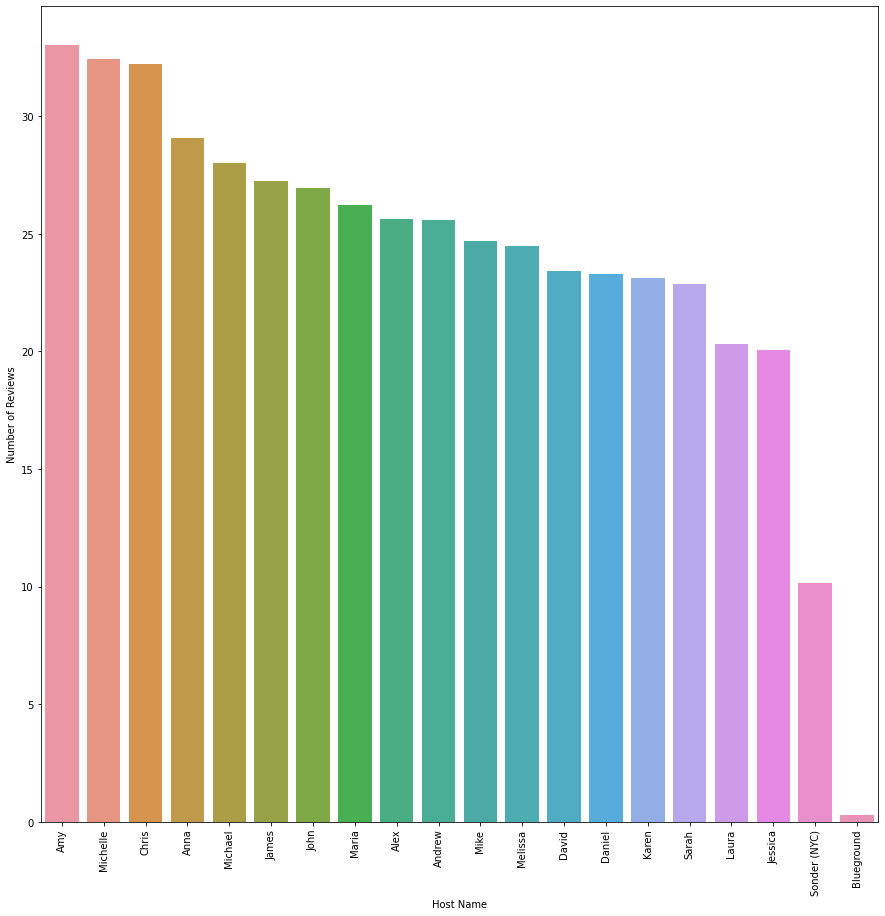

In [415]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)

fig = sns.barplot(x = d2['mean'].sort_values(ascending=False).index,
                  y = d2['mean'].sort_values(ascending=False).values)
fig.set(xlabel='Host Name', ylabel='Number of Reviews')
plt.show()

In [416]:
df.head()

NAME host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !                    NaN   
3                                               NaN            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  host name neighbourhood group neighbourhood       lat      long  \
0  Madaline            Brooklyn    Kensington  40.64749 -73.97237   
1     Jenna           Manhattan       Midtown  40.75362 -73.98377   
2     Elise           Manhattan        Harlem  40.80902 -73.94190   
3     Garry            Brooklyn  Clinton Hill  40.68514 -73.95976   
4    Lyndon           Manhattan   East Harlem  40.79851 -73.94399   

         country country code instant_bookable  ... Construction year  price  \
0  United States           US            False  ...              2020  966.0   
1  United States           US            False  ...              2007  142.0   
2  United States           US             True  ...              2005  620.0   
3  United States           US             True  ...              2005  368.0   
4  United States           US            False  ...              2009  204.0   

  service fee  minimum nights  number of reviews  last review  \
0       193.0            10.0                9.0   10/19/2021   
1        28.0            30.0               45.0    5/21/2022   
2       124.0             3.0                0.0          NaN   
3        74.0            30.0              270.0     7/5/2019   
4        41.0            10.0                9.0   11/19/2018   

   reviews per month review rate number  calculated host listings count  \
0               0.21                4.0                             6.0   
1               0.38                4.0                             2.0   
2                NaN                5.0                             1.0   
3               4.64                4.0                             1.0   
4               0.10                3.0                             1.0   

   availability 365  
0             286.0  
1             228.0  
2             352.0  
3             322.0  
4             289.0  

[5 rows x 22 columns]

In [417]:
d2  = df.groupby('host name')['reviews per month'].agg(['count', 'mean'])

In [418]:
d2 = d2.sort_values(by='count', ascending=False).head(20)

In [419]:
d2

count      mean
host name                    
Michael         738  1.444268
David           616  1.442549
John            509  1.288527
Alex            459  1.647603
Karen           414  1.893671
Sonder (NYC)    384  2.181198
Daniel          377  1.120769
Maria           375  1.626827
Sarah           353  0.997875
Anna            350  1.402400
Chris           332  1.479940
Jessica         320  1.038531
Michelle        318  1.606447
Andrew          305  1.243115
Mike            295  1.088746
Laura           286  0.832587
Melissa         281  1.295018
Jeniffer        263  0.325513
James           259  1.282124
Jennifer        257  1.052062

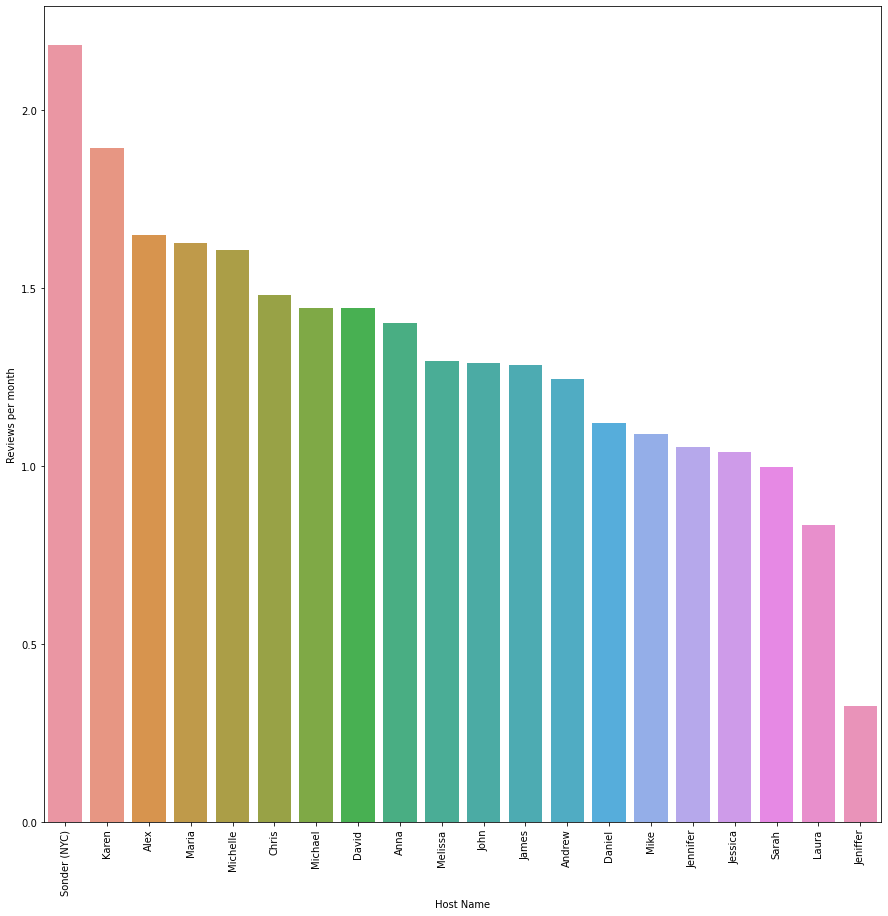

In [420]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)

fig = sns.barplot(x = d2['mean'].sort_values(ascending=False).index,
                  y = d2['mean'].sort_values(ascending=False).values)
fig.set(xlabel='Host Name', ylabel='Reviews per month')
plt.show()

<AxesSubplot:xlabel='neighbourhood group', ylabel='price'>

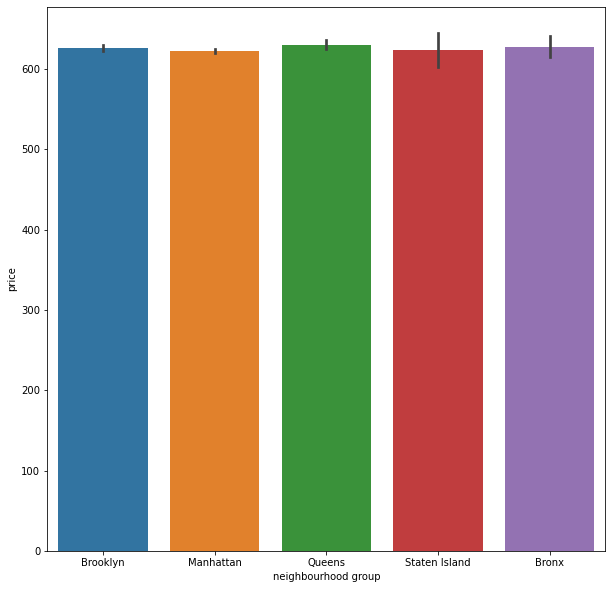

In [421]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['neighbourhood group'],y=df['price'])

In [422]:
df.head()

NAME host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !                    NaN   
3                                               NaN            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  host name neighbourhood group neighbourhood       lat      long  \
0  Madaline            Brooklyn    Kensington  40.64749 -73.97237   
1     Jenna           Manhattan       Midtown  40.75362 -73.98377   
2     Elise           Manhattan        Harlem  40.80902 -73.94190   
3     Garry            Brooklyn  Clinton Hill  40.68514 -73.95976   
4    Lyndon           Manhattan   East Harlem  40.79851 -73.94399   

         country country code instant_bookable  ... Construction year  price  \
0  United States           US            False  ...              2020  966.0   
1  United States           US            False  ...              2007  142.0   
2  United States           US             True  ...              2005  620.0   
3  United States           US             True  ...              2005  368.0   
4  United States           US            False  ...              2009  204.0   

  service fee  minimum nights  number of reviews  last review  \
0       193.0            10.0                9.0   10/19/2021   
1        28.0            30.0               45.0    5/21/2022   
2       124.0             3.0                0.0          NaN   
3        74.0            30.0              270.0     7/5/2019   
4        41.0            10.0                9.0   11/19/2018   

   reviews per month review rate number  calculated host listings count  \
0               0.21                4.0                             6.0   
1               0.38                4.0                             2.0   
2                NaN                5.0                             1.0   
3               4.64                4.0                             1.0   
4               0.10                3.0                             1.0   

   availability 365  
0             286.0  
1             228.0  
2             352.0  
3             322.0  
4             289.0  

[5 rows x 22 columns]

<AxesSubplot:xlabel='neighbourhood group', ylabel='service fee'>

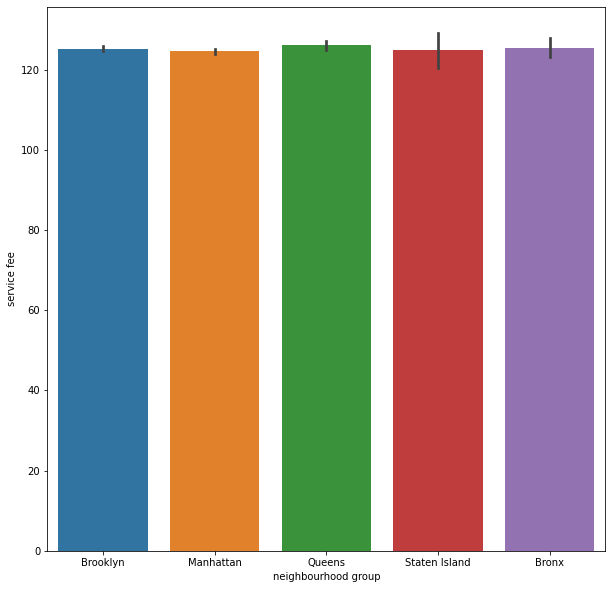

In [423]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['neighbourhood group'],y=df['service fee'])

<AxesSubplot:>

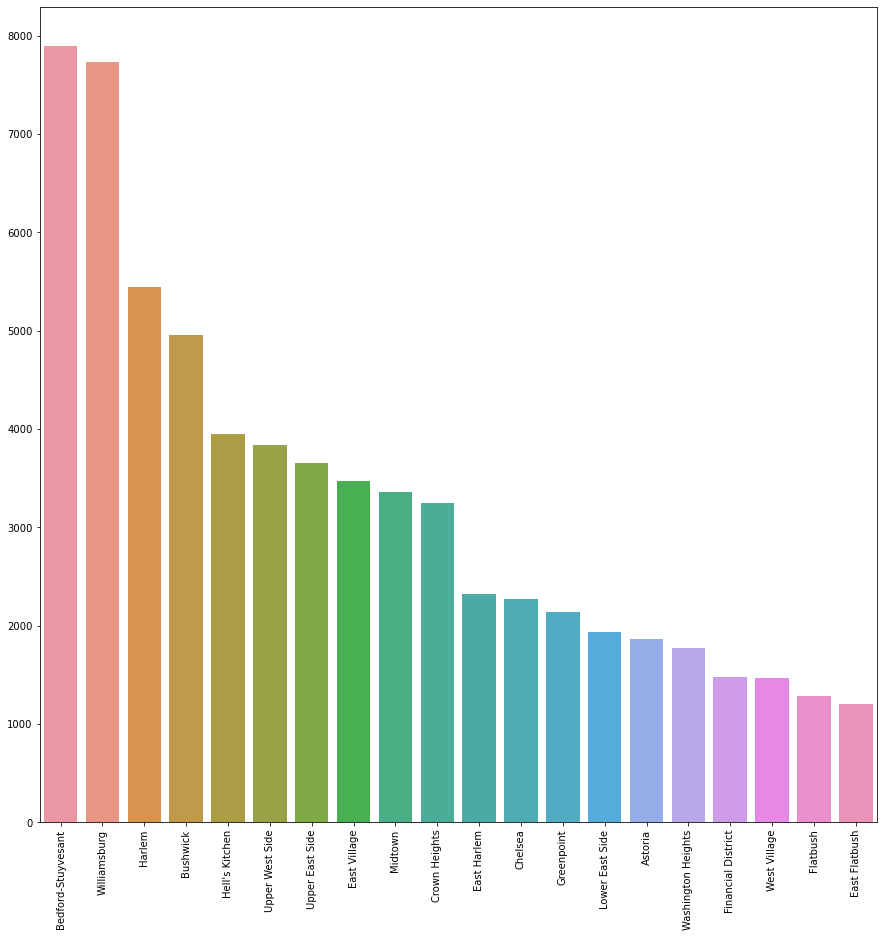

In [424]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.barplot(x=df['neighbourhood'].value_counts(ascending=False).head(20).index,
            y=df['neighbourhood'].value_counts(ascending=False).head(20).values)

In [425]:
df['neighbourhood'].value_counts(ascending=False).head(20)

Bedford-Stuyvesant    7898
Williamsburg          7732
Harlem                5441
Bushwick              4956
Hell's Kitchen        3949
Upper West Side       3841
Upper East Side       3656
East Village          3477
Midtown               3357
Crown Heights         3251
East Harlem           2322
Chelsea               2276
Greenpoint            2136
Lower East Side       1937
Astoria               1868
Washington Heights    1771
Financial District    1480
West Village          1473
Flatbush              1284
East Flatbush         1206
Name: neighbourhood, dtype: int64

In [426]:
d3 = df.groupby('neighbourhood')['price'].agg(['count', 'mean'])

In [427]:
d3 = d3.sort_values(by = 'count',ascending=False).head(20)

In [428]:
d3.index

Index(['Bedford-Stuyvesant', 'Williamsburg', 'Harlem', 'Bushwick',
       'Hell's Kitchen', 'Upper West Side', 'Upper East Side', 'East Village',
       'Midtown', 'Crown Heights', 'East Harlem', 'Chelsea', 'Greenpoint',
       'Lower East Side', 'Astoria', 'Washington Heights',
       'Financial District', 'West Village', 'Flatbush', 'East Flatbush'],
      dtype='object', name='neighbourhood')

[Text(0.5, 0, 'Neighbourhood'), Text(0, 0.5, 'price')]

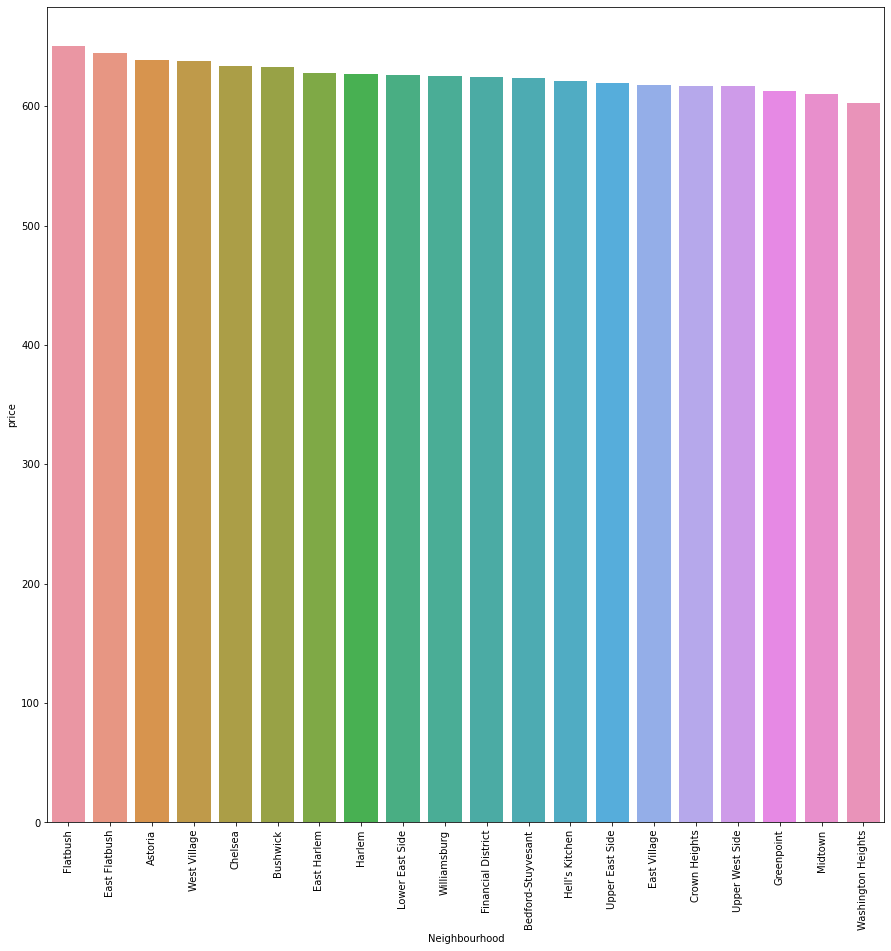

In [429]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
fig = sns.barplot(x = d3['mean'].sort_values(ascending=False).index,
           y = d3['mean'].sort_values(ascending=False).values)
fig.set(xlabel='Neighbourhood', ylabel='price')

<AxesSubplot:xlabel='instant_bookable', ylabel='price'>

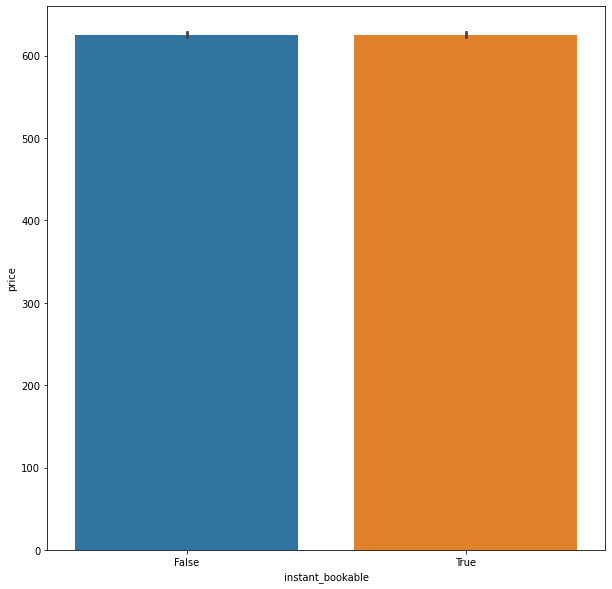

In [430]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['instant_bookable'],y=df['price'])

<AxesSubplot:xlabel='cancellation_policy', ylabel='price'>

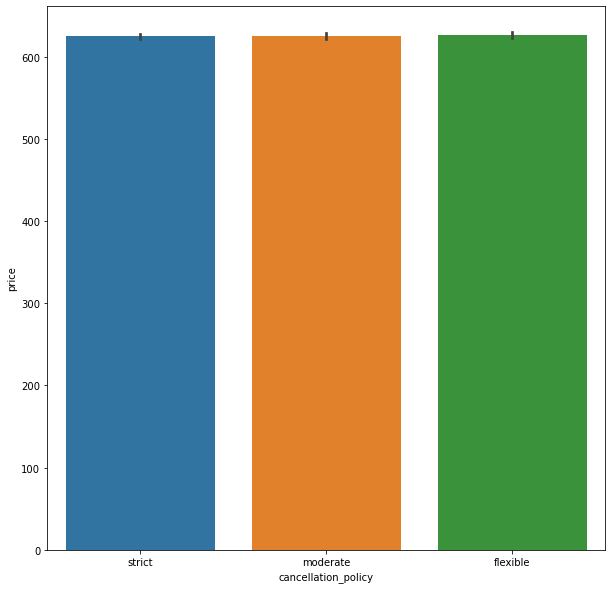

In [431]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['cancellation_policy'],y=df['price'])

<AxesSubplot:xlabel='room type', ylabel='price'>

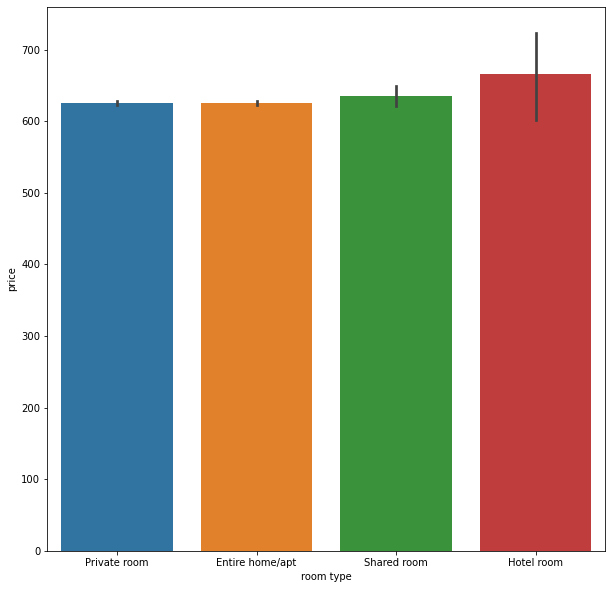

In [432]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['room type'],y=df['price'])

<Figure size 720x720 with 0 Axes>

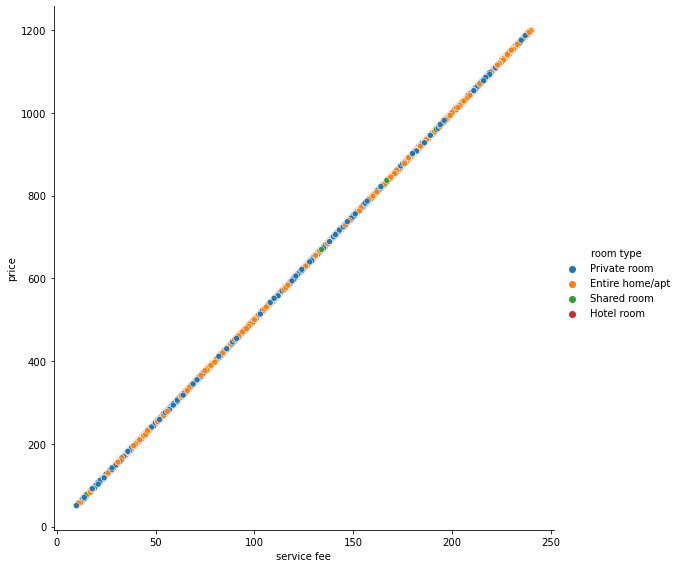

In [433]:
plt.figure(figsize=(10,10))
sns.relplot(x=df['service fee'],y=df['price'],hue=df['room type'],height=8)

<AxesSubplot:xlabel='Construction year', ylabel='price'>

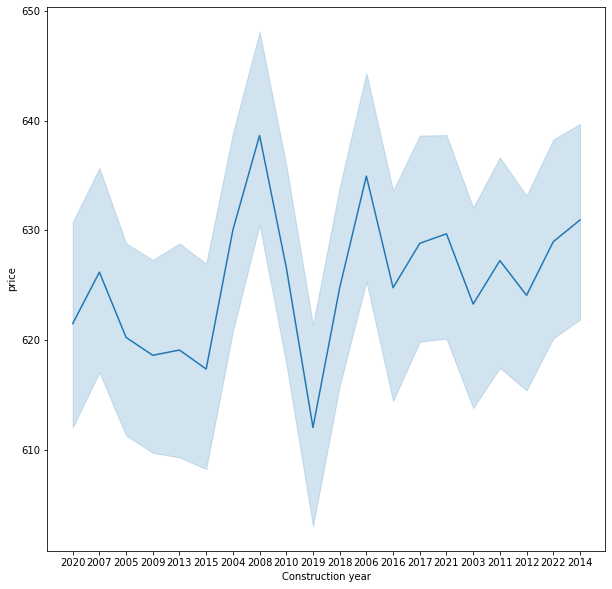

In [434]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Construction year'],y = df['price'])

In [435]:
df.isnull().sum()/len(df)*100

NAME                               0.244959
host_identity_verified             0.283172
host name                          0.395853
neighbourhood group                0.028415
neighbourhood                      0.015677
lat                                0.007839
long                               0.007839
country                            0.521272
country code                       0.128358
instant_bookable                   0.102883
cancellation_policy                0.074467
room type                          0.000000
Construction year                  0.209685
price                              0.242019
service fee                        0.267495
minimum nights                     0.391934
number of reviews                  0.179310
last review                       15.512748
reviews per month                 15.499030
review rate number                 0.312567
calculated host listings count     0.312567
availability 365                   0.438966
dtype: float64

last review and reviews per month has more missing values 

In [436]:
df[df['last review'].isnull() == False]

NAME  \
0                      Clean & quiet apt home by the park   
1                                   Skylit Midtown Castle   
3                                                     NaN   
4        Entire Apt: Spacious Studio/Loft by central park   
5               Large Cozy 1 BR Apartment In Midtown East   
...                                                   ...   
102052  ☀️Private, cozy & quiet room in Inwood Manhatt...   
102053                Cozy bright room near Prospect Park   
102054          Private Bedroom with Amazing Rooftop View   
102055      Pretty Brooklyn One-Bedroom for 2 to 4 people   
102057                                    Rosalee Stewart   

       host_identity_verified host name neighbourhood group  \
0                 unconfirmed  Madaline            Brooklyn   
1                    verified     Jenna           Manhattan   
3                 unconfirmed     Garry            Brooklyn   
4                    verified    Lyndon           Manhattan   
5                    verified  Michelle           Manhattan   
...                       ...       ...                 ...   
102052            unconfirmed      Zhoe           Manhattan   
102053            unconfirmed    Mariam            Brooklyn   
102054               verified      Trey            Brooklyn   
102055               verified   Michael            Brooklyn   
102057               verified   Stanley           Manhattan   

             neighbourhood       lat      long        country country code  \
0               Kensington  40.64749 -73.97237  United States           US   
1                  Midtown  40.75362 -73.98377  United States           US   
3             Clinton Hill  40.68514 -73.95976  United States           US   
4              East Harlem  40.79851 -73.94399  United States           US   
5              Murray Hill  40.74767 -73.97500  United States           US   
...                    ...       ...       ...            ...          ...   
102052              Inwood  40.86857 -73.91577  United States           US   
102053            Flatbush  40.64945 -73.96108  United States           US   
102054            Bushwick  40.69872 -73.92718  United States           US   
102055  Bedford-Stuyvesant  40.67810 -73.90822  United States           US   
102057              Harlem  40.81315 -73.94747  United States           US   

       instant_bookable  ... Construction year   price service fee  \
0                 False  ...              2020   966.0       193.0   
1                 False  ...              2007   142.0        28.0   
3                  True  ...              2005   368.0        74.0   
4                 False  ...              2009   204.0        41.0   
5                  True  ...              2013   577.0       115.0   
...                 ...  ...               ...     ...         ...   
102052             True  ...               NaN  1183.0         NaN   
102053             True  ...               NaN   696.0         NaN   
102054            False  ...               NaN   909.0         NaN   
102055             True  ...               NaN   387.0         NaN   
102057            False  ...              2011  1128.0         NaN   

        minimum nights  number of reviews  last review  reviews per month  \
0                 10.0                9.0   10/19/2021               0.21   
1                 30.0               45.0    5/21/2022               0.38   
3                 30.0              270.0     7/5/2019               4.64   
4                 10.0                9.0   11/19/2018               0.10   
5                  3.0               74.0    6/22/2019               0.59   
...                ...                ...          ...                ...   
102052             4.0               95.0     7/1/2019               3.65   
102053             7.0               12.0    3/27/2019               0.44   
102054             1.0               19.0    8/31/2017               0.72   
102055         

In [437]:
df[df['reviews per month'].isnull()]

NAME  \
2                     THE VILLAGE OF HARLEM....NEW YORK !   
20                      Huge 2 BR Upper East  Cental Park   
27      Magnifique Suite au N de Manhattan - vue Cloitres   
37                            Clean and Quiet in Brooklyn   
39                              Country space in the city   
...                                                   ...   
102035   rooms in sunny Loft right off the Bedford L stop   
102037                                       Bx Apartment   
102045        Private Bedroom in Rego Park / Forest Hills   
102051                A cozy getaway, home away from home   
102056         Room & private bathroom in historic Harlem   

       host_identity_verified host name neighbourhood group  \
2                         NaN     Elise           Manhattan   
20                   verified    Audrey           Manhattan   
27                   verified  Adrianna           Manhattan   
37                   verified    Arthur            Brooklyn   
39                   verified    Deanna            Brooklyn   
...                       ...       ...                 ...   
102035               verified      Anna            Brooklyn   
102037            unconfirmed       Vii               Bronx   
102045            unconfirmed       NaN              Queens   
102051               verified    Isaiah            Brooklyn   
102056            unconfirmed   Shireen           Manhattan   

             neighbourhood       lat      long        country country code  \
2                   Harlem  40.80902 -73.94190  United States           US   
20             East Harlem  40.79685 -73.94872  United States          NaN   
27                  Inwood  40.86754 -73.92639  United States          NaN   
37      Bedford-Stuyvesant  40.68876 -73.94312  United States           US   
39                Flatbush  40.63702 -73.96327  United States           US   
...                    ...       ...       ...            ...          ...   
102035        Williamsburg  40.71612 -73.95983  United States           US   
102037           Olinville  40.88438 -73.86397  United States           US   
102045           Rego Park  40.72460 -73.85688  United States           US   
102051       East New York  40.66130 -73.89088  United States           US   
102056              Harlem  40.81248 -73.94317  United States           US   

       instant_bookable  ... Construction year   price service fee  \
2                  True  ...              2005   620.0       124.0   
20                  NaN  ...              2013   281.0        56.0   
27                  NaN  ...              2017   274.0        55.0   
37                False  ...              2004   203.0        41.0   
39                 True  ...              2011  1020.0       204.0   
...                 ...  ...               ...     ...         ...   
102035             True  ...              2009   138.0         NaN   
102037             True  ...              2008   531.0         NaN   
102045            False  ...              2006     NaN         NaN   
102051             True  ...               NaN   147.0         NaN   
102056             True  ...               NaN   848.0         NaN   

        minimum nights  number of reviews  last review  reviews per month  \
2                  3.0                0.0          NaN                NaN   
20                 7.0                0.0          NaN                NaN   
27                 4.0                0.0          NaN                NaN   
37                60.0                0.0          NaN                NaN   
39                 1.0                0.0          NaN                NaN   
...                ...                ...          ...                ...   
102035            22.0                0.0          NaN                NaN   
102037             1.0                0.0          NaN                NaN   
102045             1.0                0.0          NaN                NaN   
102051         

In [438]:
df['reviews per month'].median()

0.74

<AxesSubplot:xlabel='reviews per month', ylabel='price'>

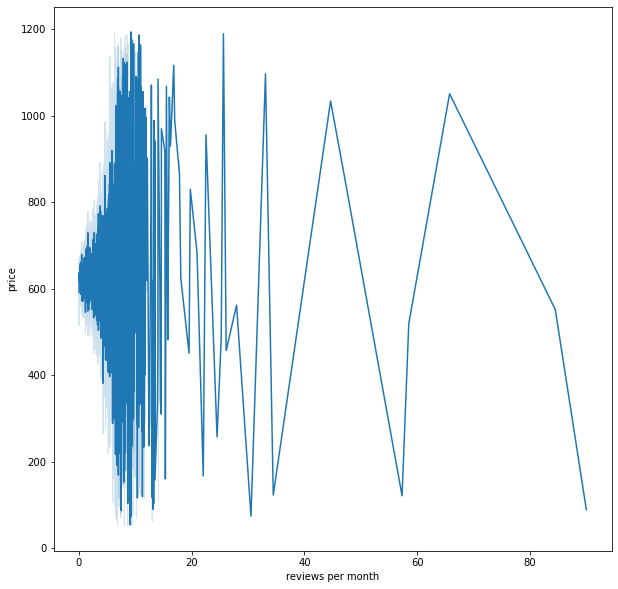

In [439]:
plt.figure(figsize=(10,10))
sns.lineplot(df['reviews per month'],y = df['price'])

In [440]:
df.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [441]:
df.corr()

lat      long     price  service fee  \
lat                             1.000000  0.074427 -0.005575    -0.005563   
long                            0.074427  1.000000  0.003356     0.003201   
price                          -0.005575  0.003356  1.000000     0.999991   
service fee                    -0.005563  0.003201  0.999991     1.000000   
minimum nights                  0.014918 -0.039551 -0.003284    -0.003465   
number of reviews              -0.025154  0.069202  0.005085     0.004978   
reviews per month              -0.019686  0.119059  0.004035     0.003939   
review rate number             -0.003771  0.015249 -0.004647    -0.004461   
calculated host listings count  0.032314 -0.104230 -0.000096     0.000050   
availability 365               -0.005054  0.058216 -0.002765    -0.003107   

                                minimum nights  number of reviews  \
lat                                   0.014918          -0.025154   
long                                 -0.039551           0.069202   
price                                -0.003284           0.005085   
service fee                          -0.003465           0.004978   
minimum nights                        1.000000          -0.049945   
number of reviews                    -0.049945           1.000000   
reviews per month                    -0.095744           0.590978   
review rate number                   -0.002244          -0.018279   
calculated host listings count        0.084489          -0.080799   
availability 365                      0.063167           0.099578   

                                reviews per month  review rate number  \
lat                                     -0.019686           -0.003771   
long                                     0.119059            0.015249   
price                                    0.004035           -0.004647   
service fee                              0.003939           -0.004461   
minimum nights                          -0.095744           -0.002244   
number of reviews                        0.590978           -0.018279   
reviews per month                        1.000000            0.037751   
review rate number                       0.037751            1.000000   
calculated host listings count          -0.025403            0.024303   
availability 365                         0.078100           -0.006038   

                                calculated host listings count  \
lat                                                   0.032314   
long                                                 -0.104230   
price                                                -0.000096   
service fee                                           0.000050   
minimum nights                                        0.084489   
number of reviews                                    -0.080799   
reviews per month                                    -0.025403   
review rate number                                    0.024303   
calculated host listings count                        1.000000   
availability 365                                      0.159005   

                                availability 365  
lat                                    -0.005054  
long                                    0.058216  
price                                  -0.002765  
service fee                            -0.003107  
minimum nights                          0.063167  
number of reviews                       0.099578  
reviews per month                       0.078100  
review rate number                     -0.006038  
calculated host listings count          0.159005  
availability 365                        1.000000

<AxesSubplot:>

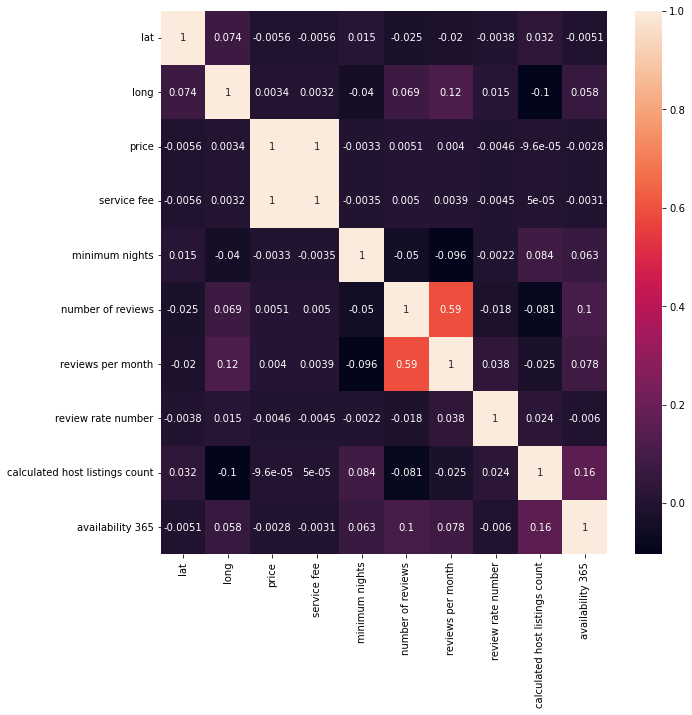

In [442]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

In [443]:
df['last review'] = pd.to_datetime(df['last review'])

In [444]:
df['last review'].median()

Timestamp('2019-06-13 00:00:00')

In [445]:
df.loc[df[df['last review'].dt.year > 2022].index,'last review'] = df['last review'].median()

In [446]:
df['last review'].median()

Timestamp('2019-06-13 00:00:00')

<AxesSubplot:xlabel='last review', ylabel='reviews per month'>

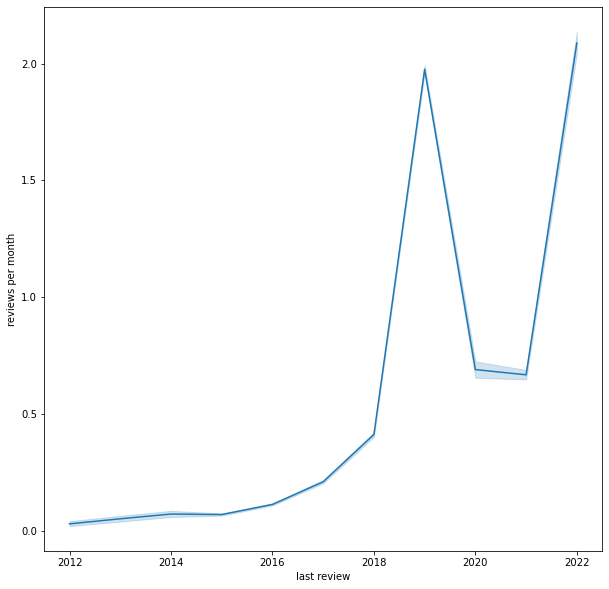

In [447]:
plt.figure(figsize=(10,10))
sns.lineplot(df['last review'].dt.year,y = df['reviews per month'])

In [448]:
df[df['last review'].dt.year > 2022]

Empty DataFrame
Columns: [NAME, host_identity_verified, host name, neighbourhood group, neighbourhood, lat, long, country, country code, instant_bookable, cancellation_policy, room type, Construction year, price, service fee, minimum nights, number of reviews, last review, reviews per month, review rate number, calculated host listings count, availability 365]
Index: []

[0 rows x 22 columns]

##### EDA Summary
Name -
- 'Rema', 'Esaie', 'Ilean', 'Antonin', 'Chun Kit', 'Jeff & TJ', 'Denae','J And Lana', 'Alejandrina', 'Muneeza', 'Gat', 'Nahi', 'Sunika','Kethy', 'Leojohn', 'Céline', 'Aidas', 'Glenis', 'Maximillian'and 'Tamara & Fran' are 20 host who earned more price.
- The service fees for verified and unverified hosts are about equal.

Hosts - 
- 'Michael', 'David', 'John', 'Alex', 'Sonder (NYC)', 'Daniel', 'Karen','Sarah', 'Maria', 'Anna', 'Andrew', 'Chris', 'Michelle', 'Jessica','Laura', 'Mike', 'Blueground', 'James', 'Melissa', 'Amy' are top 20 hosts.

Neighbourhood - 
- 'Bedford-Stuyvesant', 'Williamsburg', 'Harlem', 'Bushwick','Hell's Kitchen', 'Upper West Side', 'Upper East Side', 'East Village','Midtown', 'Crown Heights', 'East Harlem', 'Chelsea', 'Greenpoint','Lower East Side', 'Astoria', 'Washington Heights','Financial District', 'West Village', 'Flatbush', 'East Flatbush'.

Neighbourhood Group - 
- 'Queens', 'Bronx', 'Brooklyn', 'Staten Island', 'Manhattan' are top Neighbourhood Group with respect to their price.
- 'Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island' these neighbourhood has highest number of reviews.
- 'Staten Island', 'Bronx', 'Queens', 'Manhattan', 'Brooklyn' has highest rating. 

Correlation between Service fee and Price -

- As the Service fee increase the price also increase.

Construction Year -

- From year 2015 to 2019 had a highest price

Last Review -

- review per month has increased from the year 2018


Correlation -
- price, service fee, number of reviews and reviews per month are strongly correlated

Outliers -
- availability 365, reviews per month and minimum nights has outliers in it.

### Feature Engineering and Data Cleaning contd..

In [449]:
df.head()

NAME host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !                    NaN   
3                                               NaN            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  host name neighbourhood group neighbourhood       lat      long  \
0  Madaline            Brooklyn    Kensington  40.64749 -73.97237   
1     Jenna           Manhattan       Midtown  40.75362 -73.98377   
2     Elise           Manhattan        Harlem  40.80902 -73.94190   
3     Garry            Brooklyn  Clinton Hill  40.68514 -73.95976   
4    Lyndon           Manhattan   East Harlem  40.79851 -73.94399   

         country country code instant_bookable  ... Construction year  price  \
0  United States           US            False  ...              2020  966.0   
1  United States           US            False  ...              2007  142.0   
2  United States           US             True  ...              2005  620.0   
3  United States           US             True  ...              2005  368.0   
4  United States           US            False  ...              2009  204.0   

  service fee  minimum nights  number of reviews  last review  \
0       193.0            10.0                9.0   2021-10-19   
1        28.0            30.0               45.0   2022-05-21   
2       124.0             3.0                0.0          NaT   
3        74.0            30.0              270.0   2019-07-05   
4        41.0            10.0                9.0   2018-11-19   

   reviews per month review rate number  calculated host listings count  \
0               0.21                4.0                             6.0   
1               0.38                4.0                             2.0   
2                NaN                5.0                             1.0   
3               4.64                4.0                             1.0   
4               0.10                3.0                             1.0   

   availability 365  
0             286.0  
1             228.0  
2             352.0  
3             322.0  
4             289.0  

[5 rows x 22 columns]

In [450]:
df.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [451]:
df.isnull().sum()

NAME                                250
host_identity_verified              289
host name                           404
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      400
number of reviews                   183
last review                       15832
reviews per month                 15818
review rate number                  319
calculated host listings count      319
availability 365                    448
dtype: int64

In [452]:
df.select_dtypes(include='object').columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'country', 'country code', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year'],
      dtype='object')

In [453]:
categorical_variable = list(df.select_dtypes(include='object').columns)

In [454]:
categorical_variable

['NAME',
 'host_identity_verified',
 'host name',
 'neighbourhood group',
 'neighbourhood',
 'country',
 'country code',
 'instant_bookable',
 'cancellation_policy',
 'room type',
 'Construction year']

In [455]:
numerical_variable = list(df.select_dtypes(exclude="object").columns)

In [456]:
df[categorical_variable].isnull().sum()

NAME                      250
host_identity_verified    289
host name                 404
neighbourhood group        29
neighbourhood              16
country                   532
country code              131
instant_bookable          105
cancellation_policy        76
room type                   0
Construction year         214
dtype: int64

In [457]:
df[numerical_variable].isnull().sum()

lat                                   8
long                                  8
price                               247
service fee                         273
minimum nights                      400
number of reviews                   183
last review                       15832
reviews per month                 15818
review rate number                  319
calculated host listings count      319
availability 365                    448
dtype: int64

In [458]:
df.isnull().sum()

NAME                                250
host_identity_verified              289
host name                           404
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      400
number of reviews                   183
last review                       15832
reviews per month                 15818
review rate number                  319
calculated host listings count      319
availability 365                    448
dtype: int64

In [459]:
df['price'].median()

625.0

In [460]:
def categorical_filling(df,categorical_variable):
    for feature in df[categorical_variable].columns:
        df[feature] = df[feature].fillna(df[feature].mode()[0])

In [461]:
categorical_variable

['NAME',
 'host_identity_verified',
 'host name',
 'neighbourhood group',
 'neighbourhood',
 'country',
 'country code',
 'instant_bookable',
 'cancellation_policy',
 'room type',
 'Construction year']

In [462]:
df[categorical_variable].columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'country', 'country code', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year'],
      dtype='object')

In [463]:
categorical_filling(df,categorical_variable)

In [464]:
df.isnull().sum()

NAME                                  0
host_identity_verified                0
host name                             0
neighbourhood group                   0
neighbourhood                         0
lat                                   8
long                                  8
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                     0
price                               247
service fee                         273
minimum nights                      400
number of reviews                   183
last review                       15832
reviews per month                 15818
review rate number                  319
calculated host listings count      319
availability 365                    448
dtype: int64

In [465]:
df[categorical_variable].isnull().sum()

NAME                      0
host_identity_verified    0
host name                 0
neighbourhood group       0
neighbourhood             0
country                   0
country code              0
instant_bookable          0
cancellation_policy       0
room type                 0
Construction year         0
dtype: int64

In [466]:
def numerical_filling(df,features):
    for feature in df[features].columns:
        df[feature] = df[feature].fillna(df[feature].median())

In [467]:
df[numerical_variable].columns

Index(['lat', 'long', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [468]:
numerical_filling(df,numerical_variable)

In [469]:
df.isnull().sum()

NAME                              0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [470]:
df['instant_bookable'] = df['instant_bookable'].astype(object)

In [471]:
df.dtypes

NAME                                      object
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country code                              object
instant_bookable                          object
cancellation_policy                       object
room type                                 object
Construction year                         object
price                                    float64
service fee                              float64
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]
reviews per month                        float64
review rate number                       float64
calculated host list

#### Outlier Treatment


In [472]:
numeric = df.select_dtypes(include="float64").columns

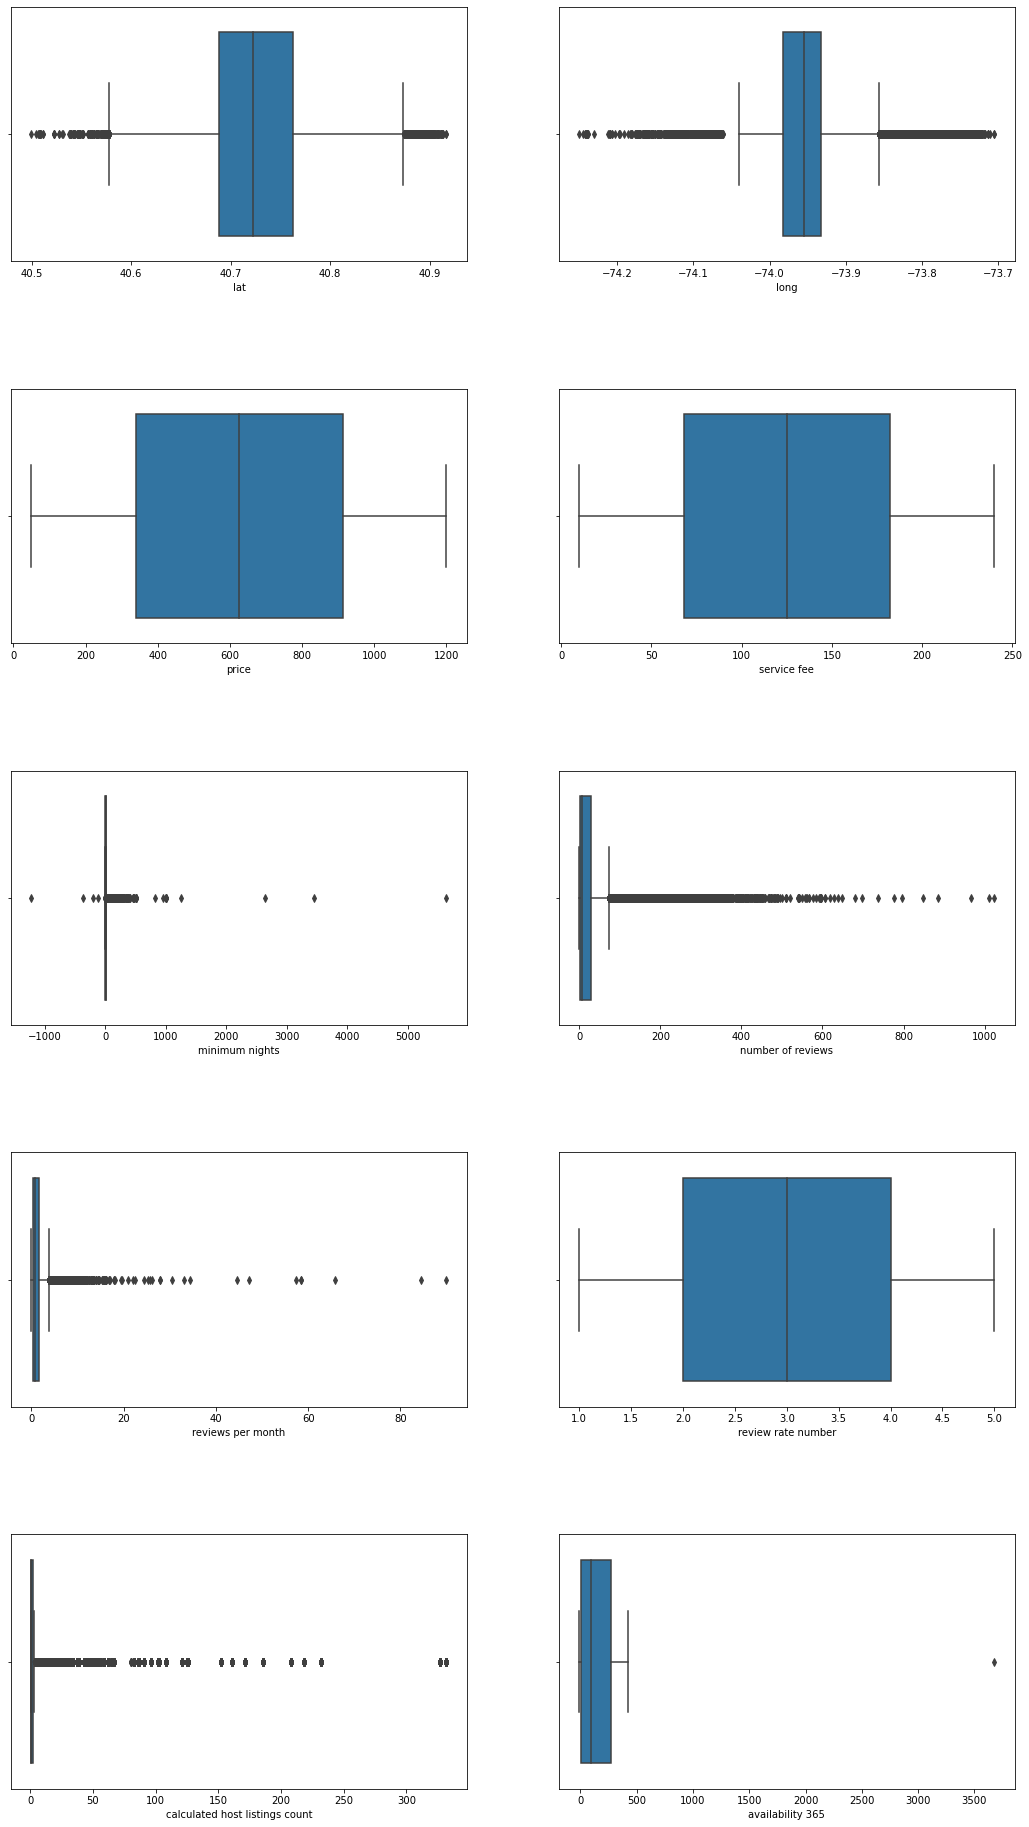

In [473]:
fig, axes = plt.subplots(len(numeric)//2, 2, figsize=(18, 18))
fig.subplots_adjust(top=1.5, right=0.9, hspace=0.5)

for i, feature in enumerate(numeric):
    sns.boxplot(x=df[feature], ax=axes[i//2, i%2])

In [474]:
df['minimum nights'].min()

-1223.0

In [475]:
df['minimum nights'].max()

5645.0

In [476]:
q1,q3 = np.percentile(df['minimum nights'],[25,75])

In [477]:
q1

2.0

In [478]:
q3

5.0

In [479]:
iqr = q3 -q1

In [480]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [481]:
lower_bound

-2.5

In [482]:
upper_bound

9.5

In [483]:
df1 = df[(df['minimum nights'] > lower_bound) & (df['minimum nights'] < upper_bound)]

In [484]:
81133/len(df)*100

79.49695271316311

In [485]:
df1['minimum nights'].min()

-2.0

<AxesSubplot:xlabel='minimum nights'>

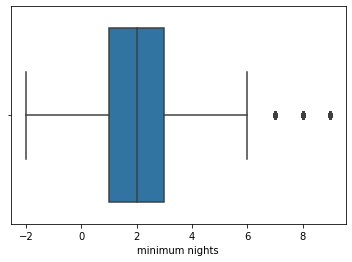

In [486]:
sns.boxplot(df1['minimum nights'])

In [487]:
df['minimum nights']

0         10.0
1         30.0
2          3.0
3         30.0
4         10.0
          ... 
102053     7.0
102054     1.0
102055     2.0
102056     2.0
102057     4.0
Name: minimum nights, Length: 102058, dtype: float64

In [488]:
df.loc[df['minimum nights'] == 10,['minimum nights','price']]

minimum nights   price
0                 10.0   966.0
4                 10.0   204.0
28                10.0   209.0
279               10.0  1003.0
380               10.0   690.0
...                ...     ...
101469            10.0   220.0
101577            10.0   552.0
101701            10.0   114.0
101805            10.0   731.0
101945            10.0   363.0

[928 rows x 2 columns]

In [489]:
df.loc[df['minimum nights'] < 0,['minimum nights','price']]

minimum nights   price
176             -10.0  1155.0
352              -5.0    73.0
398              -1.0   779.0
421             -10.0   874.0
441             -12.0   920.0
478              -2.0   410.0
525              -3.0   413.0
42446         -1223.0  1200.0
42500          -365.0   711.0
42538          -200.0    85.0
69749          -125.0   328.0
91271           -10.0   772.0
91357           -10.0  1177.0

In [490]:
df[df['minimum nights']<0]

NAME  \
176                  BROOKLYN VICTORIAN STYLE SUITE.....   
352       Beautiful, Bright’s, Warm & Spacious 1.5BR Apt   
398                   SUPER BIG AND COZY PRIVATE BEDROOM   
421                          Charming Nolita Apartment!!   
441                       Cozy apartment in a brownstone   
478                   Charming upper west side apartment   
525    Chateau Style Brooklyn Loft for Singles or Cou...   
42446            Cozy room in bright, spacious apartment   
42500  2bd BOUTIQUE  Apartament in the heart of MANHA...   
42538                   Newly Renovated Garden Apartment   
69749                Amazing location! 10ft from L train   
91271                 Beautiful modern & large 2 bedroom   
91357                            Cozy Brooklyn Apartment   

      host_identity_verified           host name neighbourhood group  \
176              unconfirmed           Frederick            Brooklyn   
352              unconfirmed               Grant            Brooklyn   
398                 verified              Tucker            Brooklyn   
421                 verified             Belinda           Manhattan   
441                 verified            Adelaide           Manhattan   
478              unconfirmed                Alen           Manhattan   
525                 verified              Carlos            Brooklyn   
42446               verified              Steven               Bronx   
42500            unconfirmed                 Tom           Manhattan   
42538               verified              Margie            Brooklyn   
69749               verified  Giorgia & Benjamin            Brooklyn   
91271            unconfirmed               Vikas           Manhattan   
91357               verified            Daniella            Brooklyn   

            neighbourhood       lat      long        country country code  \
176           Fort Greene  40.69098 -73.97113  United States           US   
352         Crown Heights  40.67174 -73.95663  United States           US   
398            Kensington  40.64302 -73.97255  United States           US   
421                Nolita  40.72094 -73.99706  United States           US   
441                Harlem  40.80497 -73.95016  United States           US   
478       Upper West Side  40.77886 -73.98042  United States           US   
525    Bedford-Stuyvesant  40.68967 -73.95445  United States           US   
42446         Hunts Point  40.81731 -73.89052  United States           US   
42500      Hell's Kitchen  40.76694 -73.98773  United States           US   
42538  Bedford-Stuyvesant  40.68470 -73.94350  United States           US   
69749        Williamsburg  40.71534 -73.94906  United States           US   
91271             Midtown  40.74433 -73.98318  United States           US   
91357             Gowanus  40.67070 -73.99118  United States           US   

      instant_bookable  ... Construction year   price service fee  \
176              False  ...              2008  1155.0       231.0   
352              False  ...              2009    73.0        15.0   
398              False  ...              2015   779.0       156.0   
421              False  ...              2008   874.0       175.0   
441              False  ...              2021   920.0       184.0   
478               True  ...              2022   410.0        82.0   
525              False  ...              2022   413.0        83.0   
42446            False  ...              2003  1200.0       240.0   
42500             True  ...              2009   711.0       142.0   
42538             True  ...              2022    85.0        17.0   
69749            False  ...              2012   328.0        66.0   
91271            False  ...              2007   772.0       154.0   
91357             True  ...              2014  1177.0       235.0   

       minimum nights  number of reviews  last review  reviews per month  \
176             -10.0              213.0   2019-06-24               2.00   
352 

In [491]:
df['minimum nights']=df['minimum nights'].apply(lambda x : abs(x) if x < 0 else x)

In [492]:
df['minimum nights'].min(),df['minimum nights'].max()

(1.0, 5645.0)

<AxesSubplot:xlabel='minimum nights'>

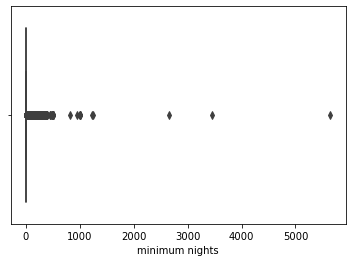

In [493]:
sns.boxplot(df['minimum nights'])

In [494]:
df1 = df.copy()

In [495]:
df1['minimum nights']

0         10.0
1         30.0
2          3.0
3         30.0
4         10.0
          ... 
102053     7.0
102054     1.0
102055     2.0
102056     2.0
102057     4.0
Name: minimum nights, Length: 102058, dtype: float64

In [496]:
q1,q3 = np.percentile(df['minimum nights'],[25,75])

In [497]:
q1

2.0

In [498]:
q3

5.0

In [499]:
iqr = q3 -q1

In [500]:
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

In [501]:
upper_bound,lower_bound

(9.5, -2.5)

In [502]:
df1[(df1['minimum nights'] < lower_bound) | (df1['minimum nights'] > upper_bound)]

NAME  \
0                     Clean & quiet apt home by the park   
1                                  Skylit Midtown Castle   
3                                    Home away from home   
4       Entire Apt: Spacious Studio/Loft by central park   
6                                        BlissArtsSpace!   
...                                                  ...   
102010                                   Brooklyn Style!   
102011  Convenience and Privacy in this shared apartment   
102035  rooms in sunny Loft right off the Bedford L stop   
102038                   HUGE BEDROOM LORIMER L TRAIN!!!   
102044   Lovely Two Bedroom & Event Space From Nonprofit   

       host_identity_verified host name neighbourhood group  \
0                 unconfirmed  Madaline            Brooklyn   
1                    verified     Jenna           Manhattan   
3                 unconfirmed     Garry            Brooklyn   
4                    verified    Lyndon           Manhattan   
6                 unconfirmed   Alberta            Brooklyn   
...                       ...       ...                 ...   
102010            unconfirmed      Tina            Brooklyn   
102011               verified     David           Manhattan   
102035               verified      Anna            Brooklyn   
102038            unconfirmed      Jose            Brooklyn   
102044               verified   Michael            Brooklyn   

             neighbourhood       lat      long        country country code  \
0               Kensington  40.64749 -73.97237  United States           US   
1                  Midtown  40.75362 -73.98377  United States           US   
3             Clinton Hill  40.68514 -73.95976  United States           US   
4              East Harlem  40.79851 -73.94399  United States           US   
6       Bedford-Stuyvesant  40.68688 -73.95596  United States           US   
...                    ...       ...       ...            ...          ...   
102010            Flatbush  40.64847 -73.96132  United States           US   
102011     Upper East Side  40.77414 -73.94643  United States           US   
102035        Williamsburg  40.71612 -73.95983  United States           US   
102038        Williamsburg  40.71355 -73.95003  United States           US   
102044  Bedford-Stuyvesant  40.69095 -73.93444  United States           US   

       instant_bookable  ... Construction year  price service fee  \
0                 False  ...              2020  966.0       193.0   
1                 False  ...              2007  142.0        28.0   
3                  True  ...              2005  368.0        74.0   
4                 False  ...              2009  204.0        41.0   
6                 False  ...              2015   71.0        14.0   
...                 ...  ...               ...    ...         ...   
102010            False  ...              2020  232.0        46.0   
102011            False  ...              2012  430.0        86.0   
102035             True  ...              2009  138.0       125.0   
102038             True  ...              2016  570.0       125.0   
102044            False  ...              2010  809.0       162.0   

        minimum nights  number of reviews  last review  reviews per month  \
0                 10.0                9.0   2021-10-19               0.21   
1                 30.0               45.0   2022-05-21               0.38   
3                 30.0              270.0   2019-07-05               4.64   
4                 10.0                9.0   2018-11-19               0.10   
6                 45.0               49.0   2017-10-05               0.40   
...                ...                ...          ...                ...   
102010            31.0                2.0   2018-03-25               0.07   
102011            30.0                4.0   2019-05-27               0.30   
102035            22.0                0.0   2019-06-13               0.74   
102038            28.0               1

In [503]:
df1[df1['minimum nights'] < lower_bound]

Empty DataFrame
Columns: [NAME, host_identity_verified, host name, neighbourhood group, neighbourhood, lat, long, country, country code, instant_bookable, cancellation_policy, room type, Construction year, price, service fee, minimum nights, number of reviews, last review, reviews per month, review rate number, calculated host listings count, availability 365]
Index: []

[0 rows x 22 columns]

In [504]:
df1.loc[df1['minimum nights'] > upper_bound,'minimum nights'] = upper_bound

In [505]:
sns.boxplot(df1['minimum nights'])

<AxesSubplot:xlabel='minimum nights'>

In [506]:
df1['minimum nights']

0         9.5
1         9.5
2         3.0
3         9.5
4         9.5
         ... 
102053    7.0
102054    1.0
102055    2.0
102056    2.0
102057    4.0
Name: minimum nights, Length: 102058, dtype: float64

In [507]:
df[df['minimum nights']==5645.0]

NAME host_identity_verified host name  \
42398  Bedroom in Prime Bushwick               verified     Elena   

      neighbourhood group neighbourhood       lat      long        country  \
42398            Brooklyn      Bushwick  40.70235 -73.92892  United States   

      country code instant_bookable  ... Construction year  price service fee  \
42398           US             True  ...              2013  453.0        91.0   

       minimum nights  number of reviews  last review  reviews per month  \
42398          5645.0                1.0   2019-06-05               0.88   

      review rate number  calculated host listings count  availability 365  
42398                4.0                             1.0               0.0  

[1 rows x 22 columns]

In [508]:
df['minimum nights'].max()

5645.0

In [509]:
df[df['availability 365'] == 366]

NAME host_identity_verified  \
135                          Most Central Location!            unconfirmed   
1775             Modern 1-bedroom in Harlem Heights            unconfirmed   
2067                     Artist Loft - Union Square            unconfirmed   
2115             Cozy private room in 2 Bedroom, BK               verified   
2120             Pretty One Bed in Brooklyn Heights               verified   
2634    Huge Sunny BR Washington Heights 1-4 guests            unconfirmed   
3004                             THE LINCOLN PARLOR            unconfirmed   
3147                               Clean & Cozy 1BD            unconfirmed   
3555               SuperBowl West Village Apartment            unconfirmed   
4339                    Spacious One Bedroom in UWS               verified   
5087                ROOFTOP SWIMMING-POOL 1/BR APT.            unconfirmed   
5745             Colorful apt, 25 mins to Manhattan               verified   
6720                       Spacious Apt in Bushwick               verified   
7611                DNTWN BK / Boerum Hill Sky Loft            unconfirmed   
8255                               2 Bedroom Duplex            unconfirmed   
9248            Private Bedroom in Shared Apartment               verified   
10267                       The Artist's Experience               verified   
10990             Furnished Apt. in Upper East Side               verified   
11087            Beautiful Bright Williamsburg Home            unconfirmed   
11395                 Beautiful Brooklyn Brownstone            unconfirmed   
12796                 Captivating rooftop apartment            unconfirmed   
12983                 Sunny 2 bedroom Apt (Chelsea)            unconfirmed   
13120                             Jewel On Parkside            unconfirmed   
13795            Cozy spot off L train - 20min>City               verified   
13868            Extra Bed in a Cozy & Sunny Studio               verified   
14320     Cozy top floor room at Brooklyn&Breakfast            unconfirmed   
14415  Manhattan -Harlem- private room / single bed            unconfirmed   
14584            Private Room & Bathroom with Sauna            unconfirmed   
14710            Astoria Suite - 20min to Manhattan               verified   
84142     Cozy top floor room at Brooklyn&Breakfast               verified   
84237  Manhattan -Harlem- private room / single bed            unconfirmed   
84406            Private Room & Bathroom with Sauna            unconfirmed   
84532            Astoria Suite - 20min to Manhattan               verified   

                            host name neighbourhood group  \
135                           Michael           Manhattan   
1775                           Martin           Manhattan   
2067                         Jonathan           Manhattan   
2115                             Mark            Brooklyn   
2120                         Patricia            Brooklyn   
2634                           Carrie           Manhattan   
3004                           Althea            Brooklyn   
3147                          Natalie            Brooklyn   
3555                             Nick           Manhattan   
4339                          Raymond           Manhattan   
5087                        Francesco           Manhattan   
5745                         Katerina            Brooklyn   
6720                           Daniel            Brooklyn   
7611                          Lindsay            Brooklyn   
8255                           Sylvia            Brooklyn   
9248                         Rosemary            Brooklyn   
10267                         Jeffrey           Manhattan   
10990                            Avik           Manhattan   
11087                         Claudia            Brooklyn   
11395                          Odette            Brooklyn   
12796                            Luke           Manhattan   
12983                         Natalie           Manh

In [510]:
df['availability 365'].max()

3677.0

In [511]:
def detect_outliers(df,feature):
    q1,q3 = np.percentile(df[feature],[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print(f'The upper bound {upper_bound} and the lower bound {lower_bound}')
    print(df[(df[feature]<lower_bound) | (df[feature]>upper_bound)])

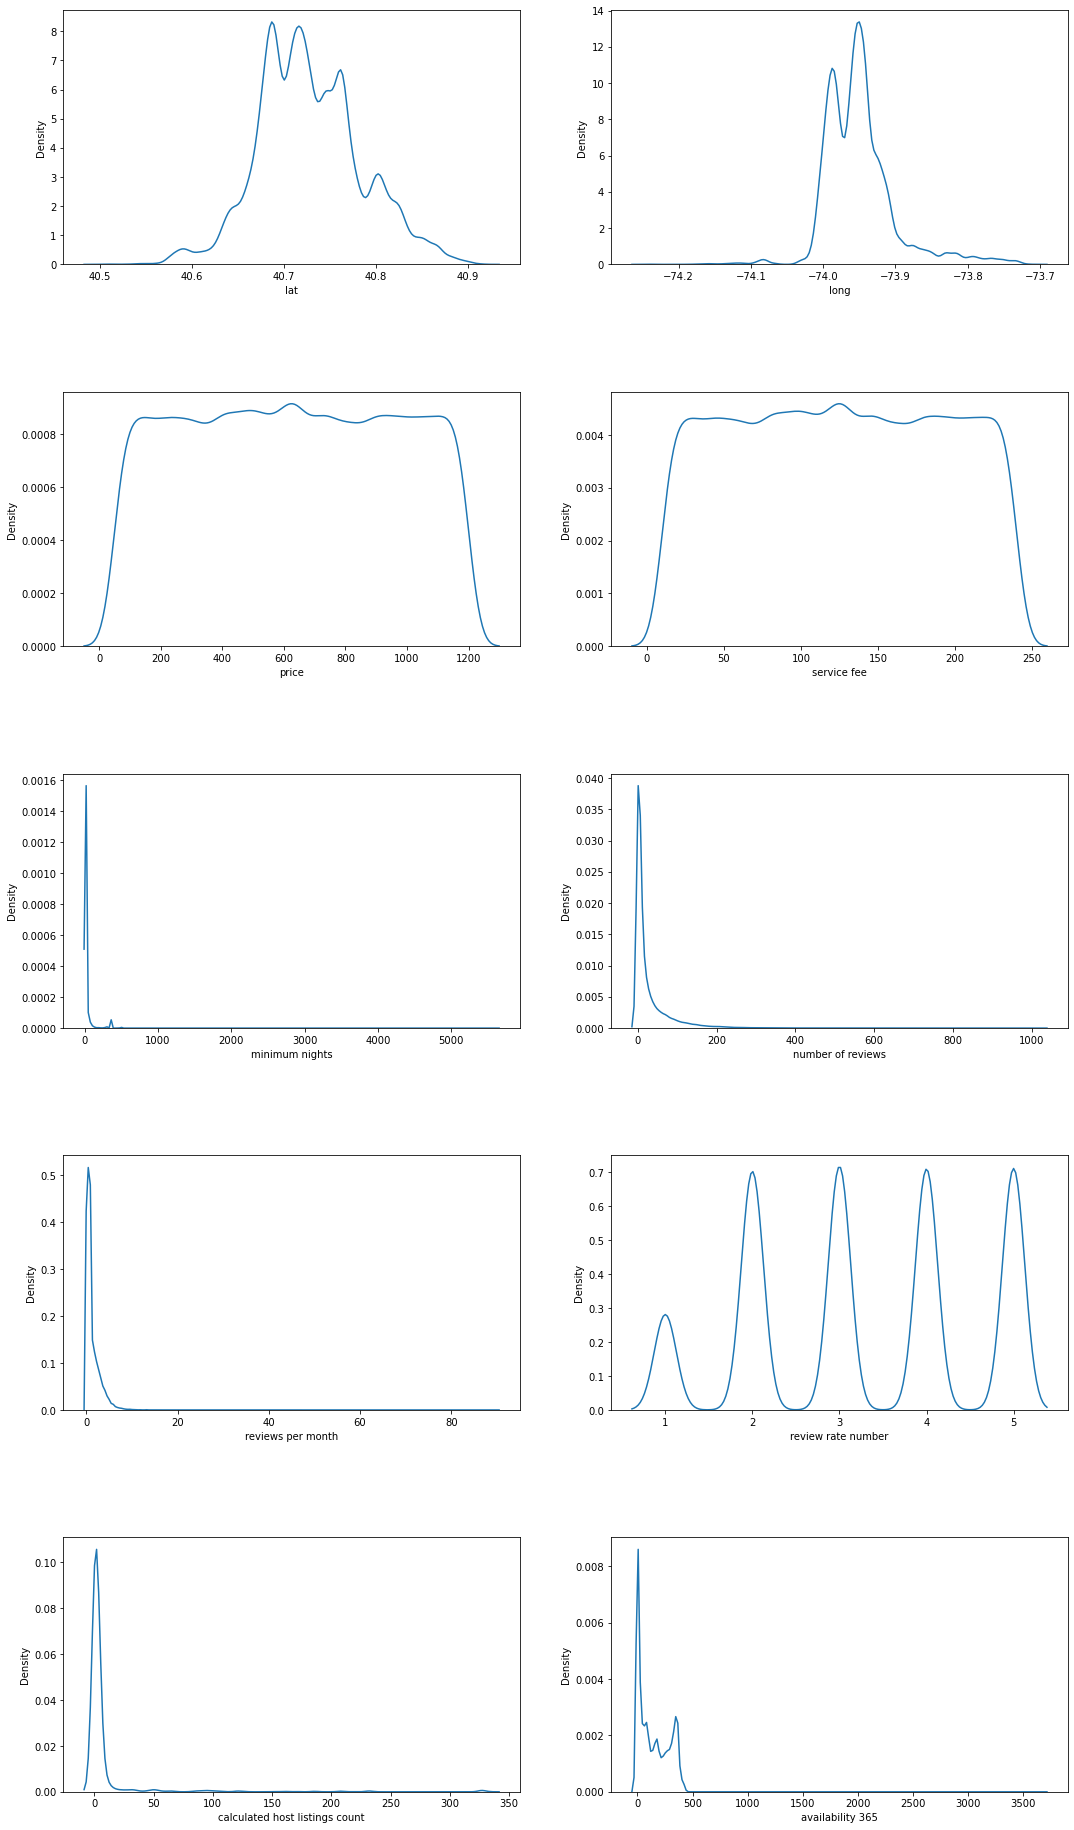

In [512]:
fig, axes = plt.subplots(len(numeric)//2, 2, figsize=(18, 18))
fig.subplots_adjust(top=1.5, right=0.9, hspace=0.5)

for i, feature in enumerate(numeric):
    sns.kdeplot(x=df[feature], ax=axes[i//2, i%2])

In [513]:
df[df['minimum nights'] > 500]

NAME  \
350                  LARGE 1BR (CONV 2BR) CROWN HEIGHTS   
2855                                Home away from home   
5768                   Prime W. Village location 1 bdrm   
13405                Historic Designer 2 Bed. Apartment   
26342                   Beautiful place in Brooklyn! #2   
38665                      Shared Studio (females only)   
42369    Private room in a perfect location in the city   
42398                         Bedroom in Prime Bushwick   
42407  Modern & Cozy 2 BR Private Apartment in Brooklyn   
42446           Cozy room in bright, spacious apartment   
71031                               Home away from home   
83506                   Beautiful place in Brooklyn! #2   
99691                             Cozy Home in Harlem ✨   

      host_identity_verified  host name neighbourhood group  \
350                 verified    Russell            Brooklyn   
2855                verified      Peter           Manhattan   
5768                verified  Genevieve           Manhattan   
13405               verified   Glenn H.           Manhattan   
26342            unconfirmed      Angie            Brooklyn   
38665            unconfirmed        Meg           Manhattan   
42369            unconfirmed       Shai           Manhattan   
42398               verified      Elena            Brooklyn   
42407            unconfirmed         Gk            Brooklyn   
42446               verified     Steven               Bronx   
71031            unconfirmed      Peter           Manhattan   
83506            unconfirmed      Angie            Brooklyn   
99691            unconfirmed      Sasha           Manhattan   

           neighbourhood       lat      long        country country code  \
350        Crown Heights  40.67473 -73.94494  United States           US   
2855   Battery Park City  40.71239 -74.01620  United States           US   
5768   Greenwich Village  40.73293 -73.99782  United States           US   
13405             Harlem  40.82915 -73.94034  United States           US   
26342       Williamsburg  40.71772 -73.95059  United States           US   
38665  Greenwich Village  40.73094 -73.99900  United States           US   
42369    Upper East Side  40.76174 -73.96625  United States           US   
42398           Bushwick  40.70235 -73.92892  United States           US   
42407          Bay Ridge  40.63189 -74.02322  United States           US   
42446        Hunts Point  40.81731 -73.89052  United States           US   
71031  Battery Park City  40.71239 -74.01620  United States           US   
83506       Williamsburg  40.71772 -73.95059  United States           US   
99691             Harlem  40.81102 -73.94712  United States           US   

      instant_bookable  ... Construction year   price service fee  \
350              False  ...              2003  1142.0       228.0   
2855              True  ...              2016   198.0        40.0   
5768             False  ...              2008   379.0        76.0   
13405            False  ...              2016   805.0       161.0   
26342            False  ...              2009   121.0        24.0   
38665             True  ...              2014   649.0       130.0   
42369            False  ...              2016   360.0        72.0   
42398             True  ...              2013   453.0        91.0   
42407            False  ...              2022   843.0       169.0   
42446            False  ...              2003  1200.0       240.0   
71031             True  ...              2016   198.0        40.0   
83506             True  ...              2009   121.0        24.0   
99691            False  ...              2015   303.0        61.0   

       minimum nights  number of reviews  last review  reviews per month  \
350            3455.0                0.0   2019-06-13               0.74   
2855           1000.0                0.0   2019-06-13               0.74   
5768           1250.0                2.0   2014-11-09               0.03   
13405

- Few rows include values larger than 500 since the data is inadequate at best. The upper bound for the iqr approach produced a value of 9.5, which is a less inconsistent way to handle an outlier.
- In availability 365 few values are greater than 365.
- Removing outliers from the remaining columns, such as "number of reviews," "reviews per month," and "review rate number," may weaken the quality of the data because reviews provide more insight about the host and city.